###  Import required Library

In order to progress with loading the data and visualising patterns/trends in the data we need to import required libraries. So in the below steps we will import the libraries that are required

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'heart.csv', 'Heart_Disease_Exploratory_Data_Analysis-Stacking.ipynb', 'Heart_Disease_Exploratory_Data_Analysis.ipynb', 'img', 'InitialReport.docx', 'LiteratureReview.docx', 'Methodology.png', 'modelForPrediction.sav', 'panigrahy_proposal.docx', 'prediction.ipynb', 'processed.cleveland.data', 'Random_Forest_Best Params.png', 'standardScaler.sav']


### Read the source file

In [2]:
# column names in accordance with feature information
col_names = ['age','sex','chest_pain','blood_pressure','serum_cholestoral','fasting_blood_sugar', 'electrocardiographic',
             'max_heart_rate','induced_angina','ST_depression','slope','no_of_vessels','thal','target']

# read the file
heart_df = pd.read_csv("heart.csv", names=col_names, header=0, na_values="?")

Display first 5 rows of data. Index starts from Zero (0)

In [3]:
heart_df.head()

,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,no_of_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [290]:
heart_df['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

In [291]:
heart_df['no_of_vessels'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [4]:
heart_df['target'] == 0

0      False
1      False
2      False
3      False
4      False
       ...  
298     True
299     True
300     True
301     True
302     True
Name: target, Length: 303, dtype: bool

In [5]:
heart_df.loc[heart_df['target'] == 0]

,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,no_of_vessels,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


##### Verifying it as a 'dataframe' object in pandas

In [6]:
type(heart_df)

pandas.core.frame.DataFrame

###### Shape of dataset

In [7]:
print("Number of records: {}\nNumber of attributes: {}".format(heart_df.shape[0], heart_df.shape[1]))

Number of records: 303
Number of attributes: 14


There are total 303 records and 14 attributes. Out of which the attribute named "target" is the output variable.

##### Describe the dataset

In [8]:
pd.set_option('display.float_format', '{:.2f}'.format)
heart_df.describe()

,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,no_of_vessels,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [9]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   303 non-null    int64  
 1   sex                   303 non-null    int64  
 2   chest_pain            303 non-null    int64  
 3   blood_pressure        303 non-null    int64  
 4   serum_cholestoral     303 non-null    int64  
 5   fasting_blood_sugar   303 non-null    int64  
 6   electrocardiographic  303 non-null    int64  
 7   max_heart_rate        303 non-null    int64  
 8   induced_angina        303 non-null    int64  
 9   ST_depression         303 non-null    float64
 10  slope                 303 non-null    int64  
 11  no_of_vessels         303 non-null    int64  
 12  thal                  303 non-null    int64  
 13  target                303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
heart_df.isnull().sum()

age                     0
sex                     0
chest_pain              0
blood_pressure          0
serum_cholestoral       0
fasting_blood_sugar     0
electrocardiographic    0
max_heart_rate          0
induced_angina          0
ST_depression           0
slope                   0
no_of_vessels           0
thal                    0
target                  0
dtype: int64

From the above table of data, we can conclude that: 
* None of the columns are having missing values. 
* All the attributes are in numeric form
* The magnitude of range of values for attributes age, trestbps, chol and thalach are high with comparision to the other attributes.



From dataset description, we know, however, that most of features are categorical and it's necessary to distinguish them.

In [11]:
# extract numeric columns and find categorical ones
numeric_columns = ['serum_cholestoral', 'max_heart_rate', 'age', 'blood_pressure', 'ST_depression']
categorical_columns = [c for c in heart_df.columns if c not in numeric_columns]
print('Categorical features are: ',categorical_columns)

Categorical features are:  ['sex', 'chest_pain', 'fasting_blood_sugar', 'electrocardiographic', 'induced_angina', 'slope', 'no_of_vessels', 'thal', 'target']


### Exploratory Data Analysis (EDA)

Code reference for Exploratory Data analysis is taken from the below sources:

https://github.com/kochansky/heart-disease-prediction/blob/master/Heart_Disease_project.ipynb

https://github.com/g-shreekant/Heart-Disease-Prediction-using-Machine-Learning/blob/master/Heart_disease_prediction.ipynb

https://www.kaggle.com/sreeram1234/heart-disease-basic-eda-with-insights

##### First, analysing the target variable:

Knowing the distribution of target value is vital for choosing appropriate accuracy metrics and consequently properly assess different machine learning models

1    165
0    138
Name: target, dtype: int64


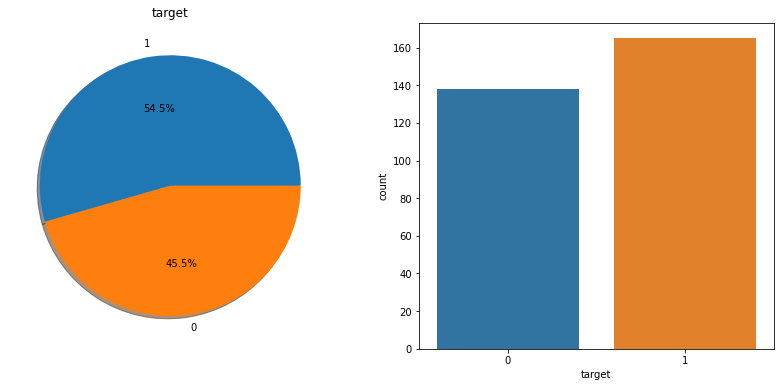

In [12]:
# create two plots side by side
target_temp = heart_df.target.value_counts()

print(target_temp)

f, ax = plt.subplots(1,2,figsize=(14,6))
heart_df['target'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('target', data=heart_df, ax=ax[1])
plt.show()

In [13]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


**Observations:**
- From the above graphs, we could conclude that this a ***binary supervised machine learning problem***, since it has 2 values in the target attribute.
- Now the distribution of target value is almost equal, hence we don't have to perform any sampling techniques to balance the datasets.

###### Relationship between target and other attributes: 

###### Gender vs Target

In [14]:
heart_df.groupby(by=['sex', 'target'])['target'].count()

sex  target
0    0          24
     1          72
1    0         114
     1          93
Name: target, dtype: int64

In [15]:
pd.crosstab(heart_df['sex'], heart_df['target'])

target,0,1
sex,,
0,24,72
1,114,93


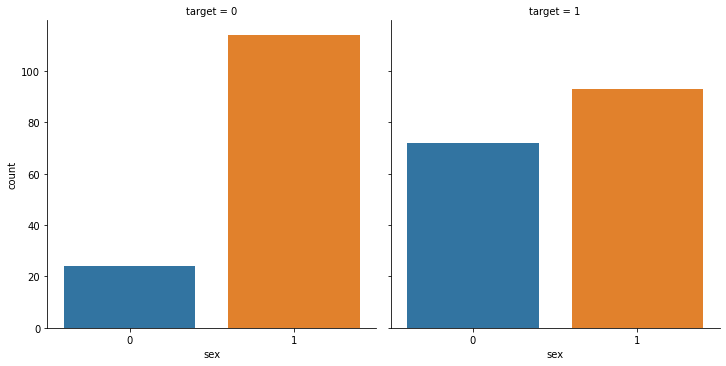

In [16]:
sns.catplot(x='sex', col='target', kind='count', data=heart_df);

In [17]:
print("% of women suffering from heart disease: " , heart_df.loc[heart_df.sex == 0].target.sum()/heart_df.loc[heart_df.sex == 0].target.count())
print("% of men suffering from heart disease:   " , heart_df.loc[heart_df.sex == 1].target.sum()/heart_df.loc[heart_df.sex == 1].target.count())

% of women suffering from heart disease:  0.75
% of men suffering from heart disease:    0.4492753623188406


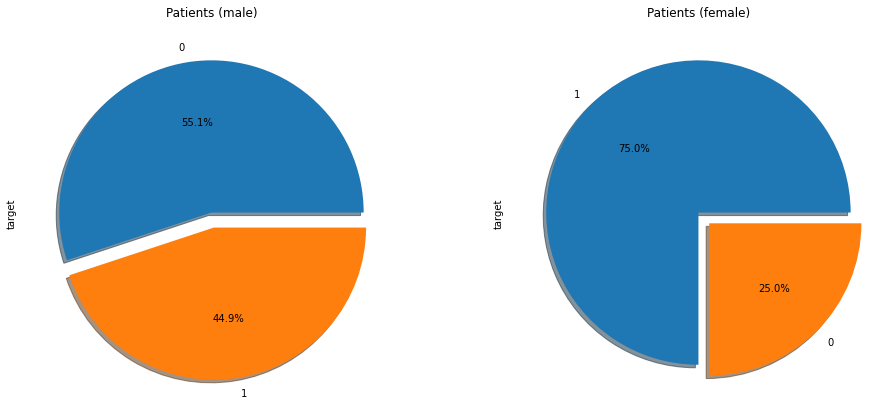

In [18]:
f,ax=plt.subplots(1,2,figsize=(16,7))

heart_df.loc[heart_df['sex']==1, 'target'].value_counts().plot.pie(explode=[0,0.10],autopct='%1.1f%%',ax=ax[0],shadow=True)
heart_df.loc[heart_df['sex']==0, 'target'].value_counts().plot.pie(explode=[0,0.10],autopct='%1.1f%%',ax=ax[1],shadow=True)

ax[0].set_title('Patients (male)')
ax[1].set_title('Patients (female)')

plt.show()

Percentage of female is having more chances of having heart disease, than male as per this dataset.

###### Chest Pain vs Target

In [19]:
heart_df.groupby(by=['chest_pain', 'target'])['target'].count()

chest_pain  target
0           0         104
            1          39
1           0           9
            1          41
2           0          18
            1          69
3           0           7
            1          16
Name: target, dtype: int64

In [20]:
pd.crosstab(heart_df['chest_pain'], heart_df['target']).style.background_gradient(cmap='autumn_r')

target,0,1
chest_pain,,
0,104,39
1,9,41
2,18,69
3,7,16


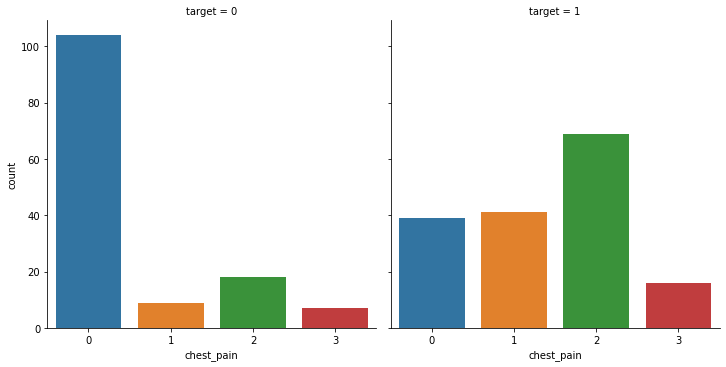

In [21]:
sns.catplot(x='chest_pain', col='target', kind='count', data=heart_df);

Patients who had chest pain type 2 is more in the category of people with disease. Also, chest pain type 0 is not that serious as there are many people (~110) who had chest pain type 0 without heart disease.

###### Fasting blood sugar vs Target

In [22]:
heart_df.groupby(by=['fasting_blood_sugar', 'target'])['target'].count()

fasting_blood_sugar  target
0                    0         116
                     1         142
1                    0          22
                     1          23
Name: target, dtype: int64

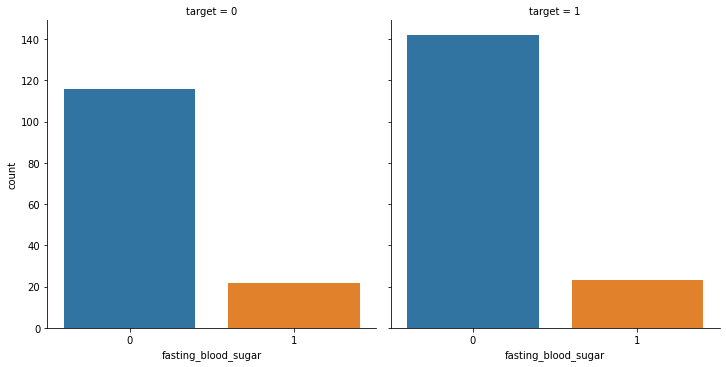

In [23]:
sns.catplot(x='fasting_blood_sugar', col='target', kind='count', data=heart_df);

Number of people considering blood sugar is almost similar in both categories. Fasting blood sugar won't be a good indicator always for determining heart disease from this dataset.

###### Resting electrocardiographic vs Target

In [24]:
heart_df.groupby(by=['electrocardiographic', 'target'])['target'].count()

electrocardiographic  target
0                     0         79
                      1         68
1                     0         56
                      1         96
2                     0          3
                      1          1
Name: target, dtype: int64

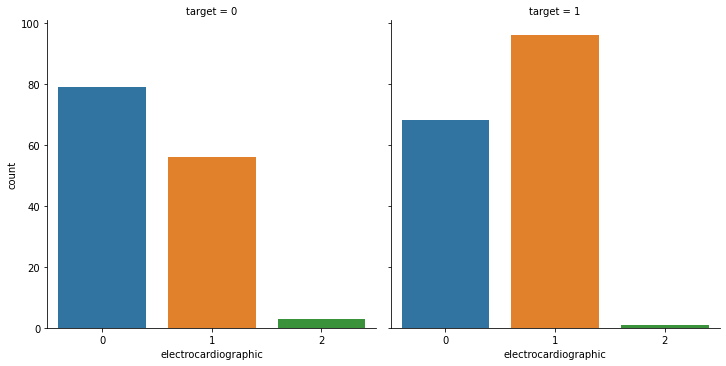

In [25]:
sns.catplot(x='electrocardiographic', col='target', kind='count', data=heart_df)

Patients who had Resting electrocardiographic type 1 is more in the category of people with disease.

###### Exercise Induced Angina vs Target

In [26]:
heart_df.groupby(by=['induced_angina', 'target'])['target'].count()

induced_angina  target
0               0          62
                1         142
1               0          76
                1          23
Name: target, dtype: int64

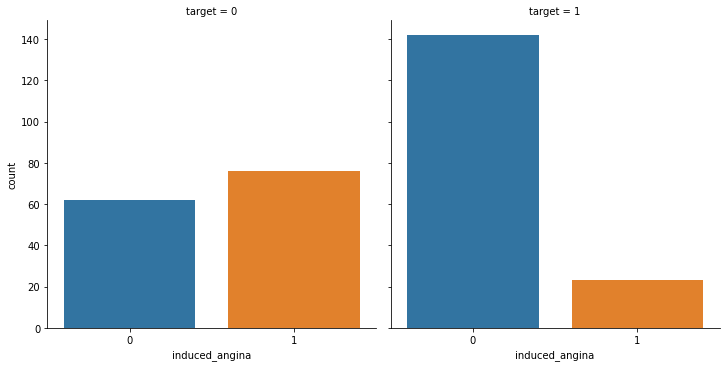

In [27]:
sns.catplot(x='induced_angina', col='target', kind='count', data=heart_df)

People without exercise induced angina is more in the category with disease.

###### Slope vs Target

In [28]:
heart_df.groupby(by=['slope', 'target'])['target'].count()

slope  target
0      0          12
       1           9
1      0          91
       1          49
2      0          35
       1         107
Name: target, dtype: int64

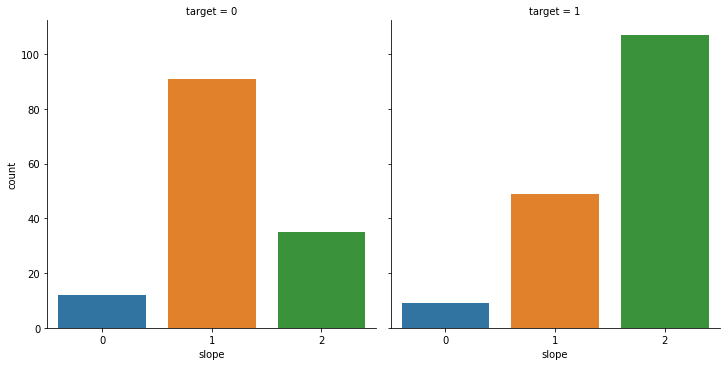

In [29]:
sns.catplot(x='slope', col='target', kind='count', data=heart_df);

Number of people with downsloping is more in the category with diesease.

###### No Of Vessels vs Target

In [30]:
heart_df.groupby(by=['no_of_vessels', 'target'])['target'].count()

no_of_vessels  target
0              0          45
               1         130
1              0          44
               1          21
2              0          31
               1           7
3              0          17
               1           3
4              0           1
               1           4
Name: target, dtype: int64

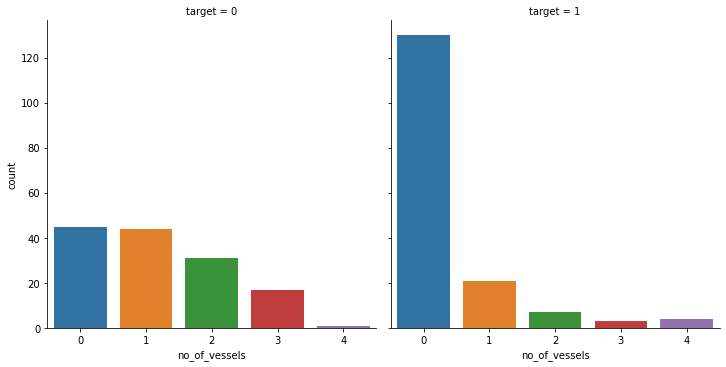

In [31]:
sns.catplot(x='no_of_vessels', col='target', kind='count', data=heart_df);

Most of the people with heart disease have Number of vessels as 0.

###### Thal vs Target 

In [32]:
heart_df.groupby(by=['thal', 'target'])['target'].count()

thal  target
0     0           1
      1           1
1     0          12
      1           6
2     0          36
      1         130
3     0          89
      1          28
Name: target, dtype: int64

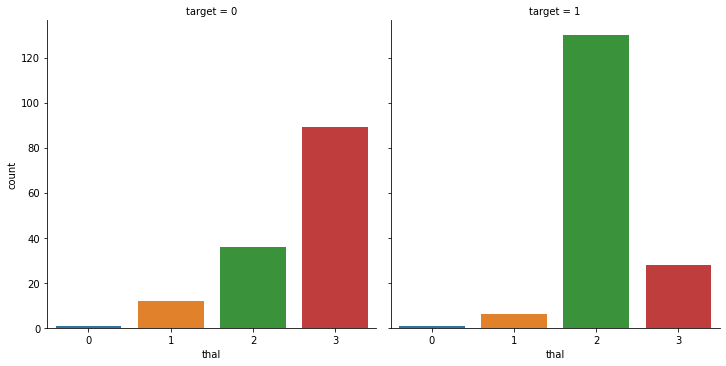

In [33]:
sns.catplot(x='thal', col='target', kind='count', data=heart_df);

Most of the people with heart disease have thal as 2.

##### Numeric features

There are 5 numeric columns, so let's take care of them first. Outliers occurrence in the dataset may be a result of wrong input and create undesired noise, thus our role is to evaluate their substance. A data point is considered as an outlier when it falls outside 3 standard deviations.

In [34]:
heart_df[numeric_columns].describe()

,serum_cholestoral,max_heart_rate,age,blood_pressure,ST_depression
count,303.00,303.00,303.00,303.00,303.00
mean,246.26,149.65,54.37,131.62,1.04
std,51.83,22.91,9.08,17.54,1.16
min,126.00,71.00,29.00,94.00,0.00
25%,211.00,133.50,47.50,120.00,0.00
50%,240.00,153.00,55.00,130.00,0.80
75%,274.50,166.00,61.00,140.00,1.60
max,564.00,202.00,77.00,200.00,6.20


##### Distibution of Data 

A histogram is a plot that lets you discover, and show, the underlying frequency distribution (shape) of a set of continuous data. This allows the inspection of the data for its underlying distribution (e.g., normal distribution), outliers, skewness, etc.


Distplot() combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot() and rugplot() functions. It can also fit scipy.stats distributions and plot the estimated Probability Distribution Function over the data.

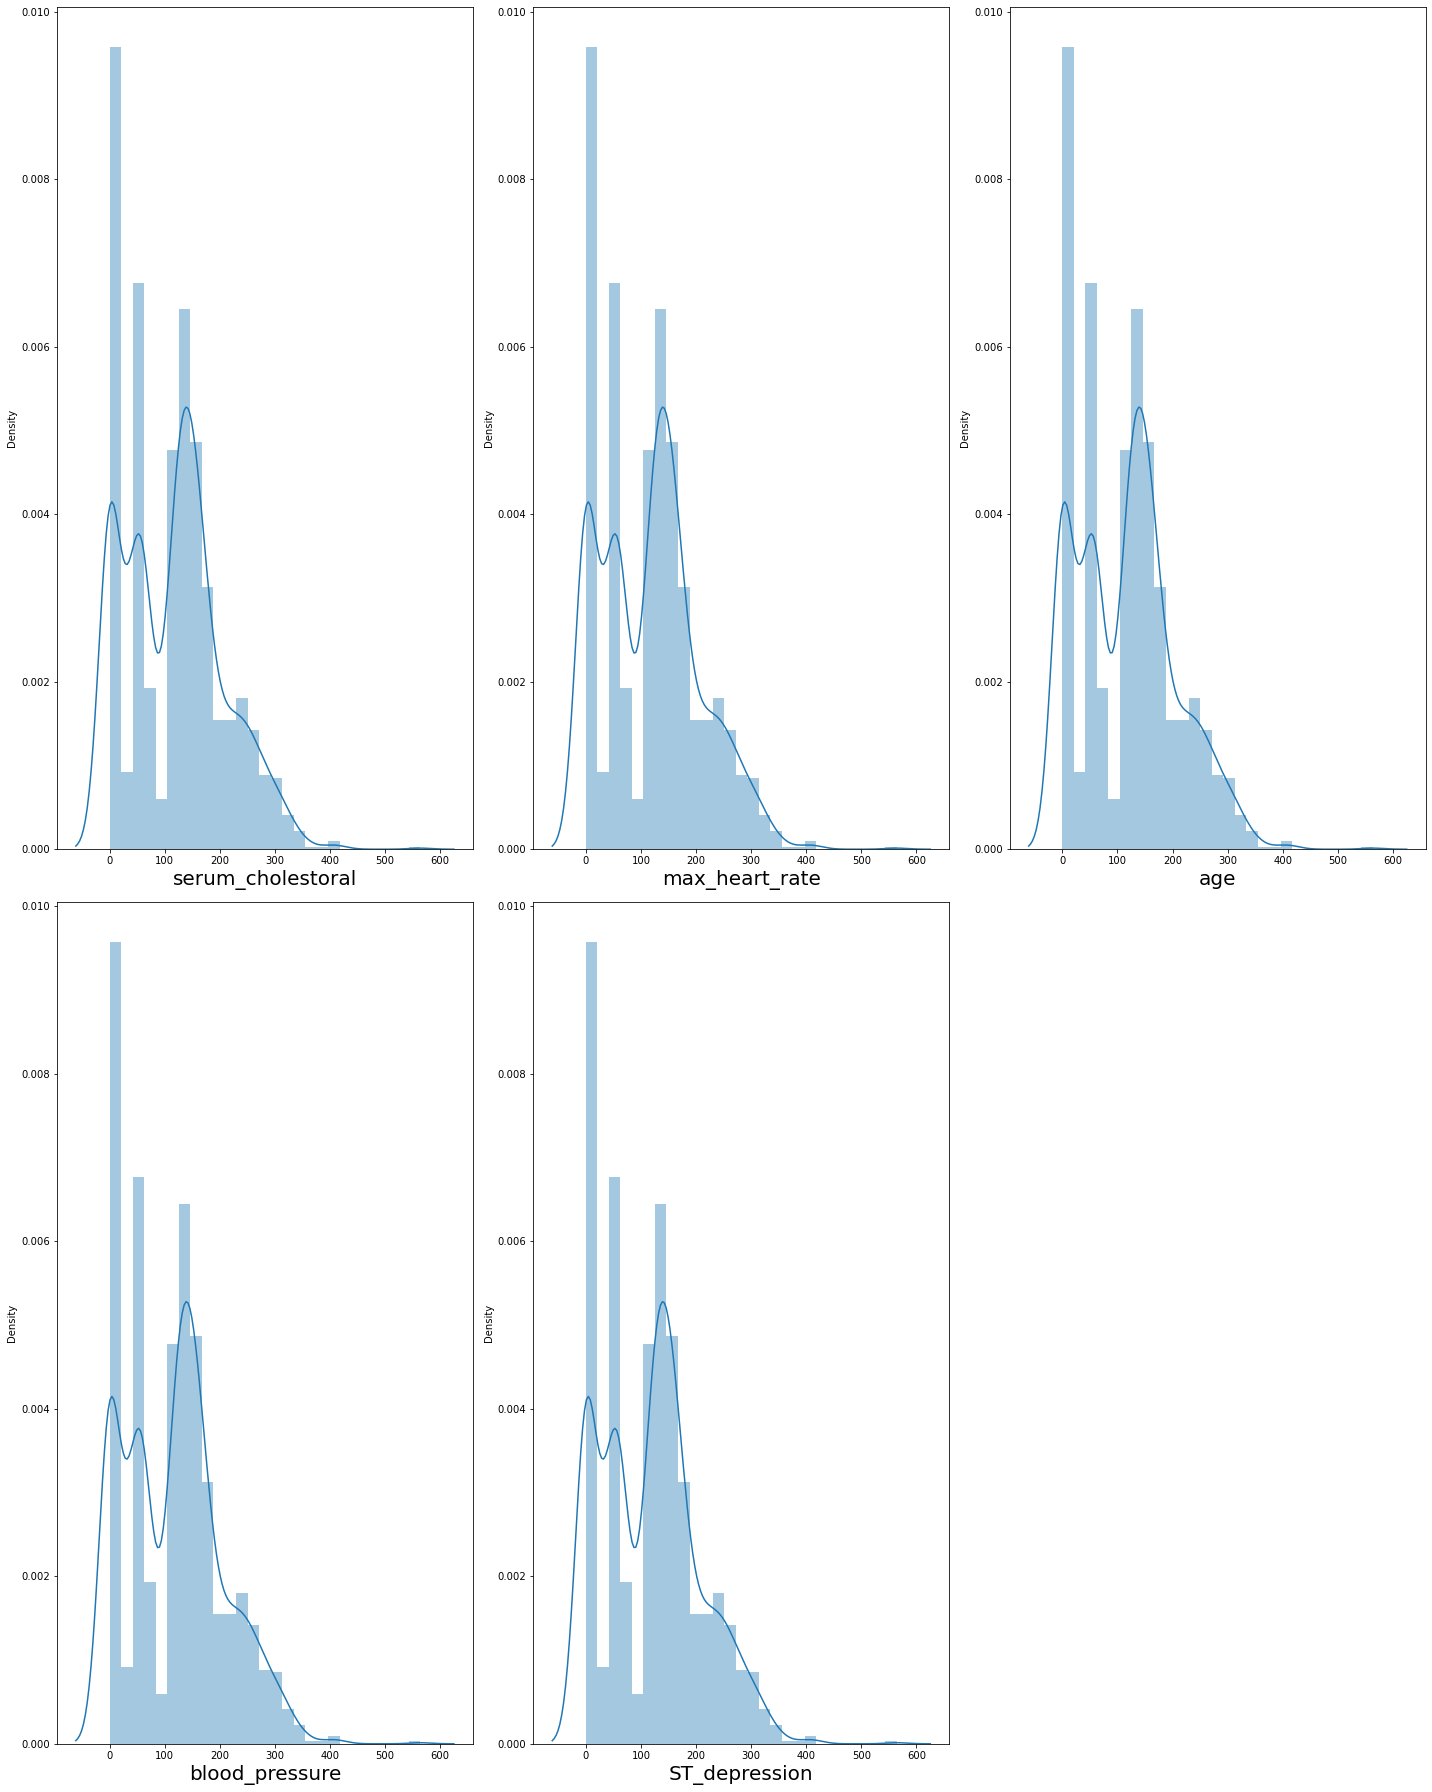

In [35]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numeric_columns:
    if plotnumber<=5 :
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(heart_df[numeric_columns])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

array([[<AxesSubplot:title={'center':'serum_cholestoral'}>,
        <AxesSubplot:title={'center':'max_heart_rate'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'blood_pressure'}>],
       [<AxesSubplot:title={'center':'ST_depression'}>, <AxesSubplot:>]],
      dtype=object)

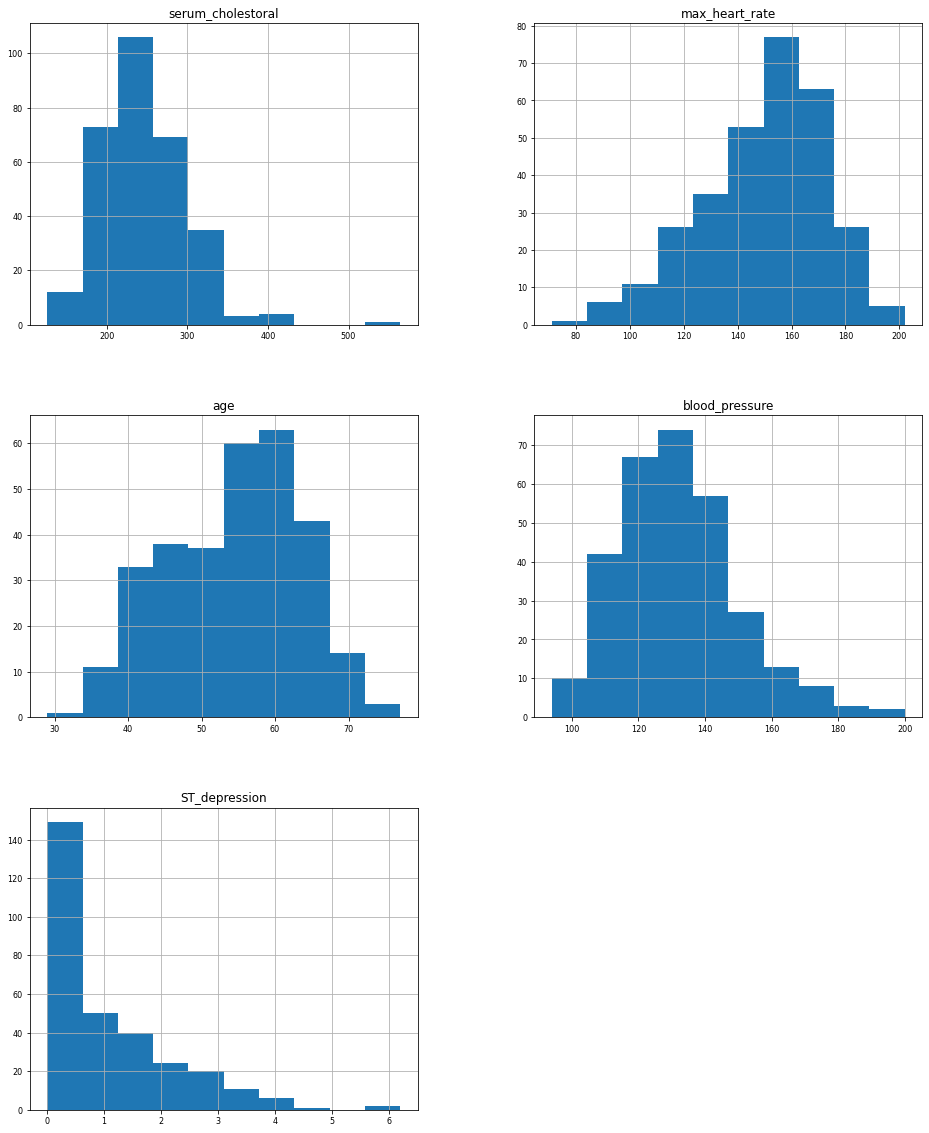

In [36]:

#heart.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
# add bins ^^^

heart_df[numeric_columns].hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

In [37]:
import scipy.stats as stat
import pylab

In [38]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

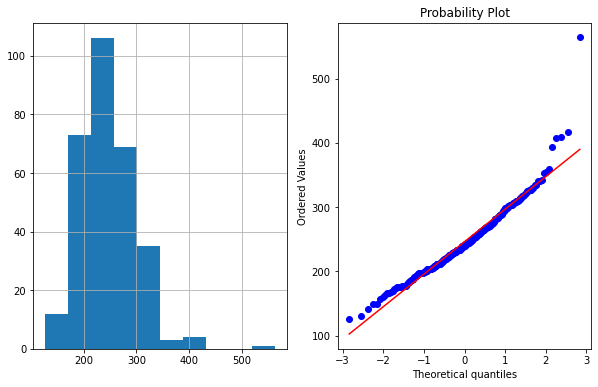

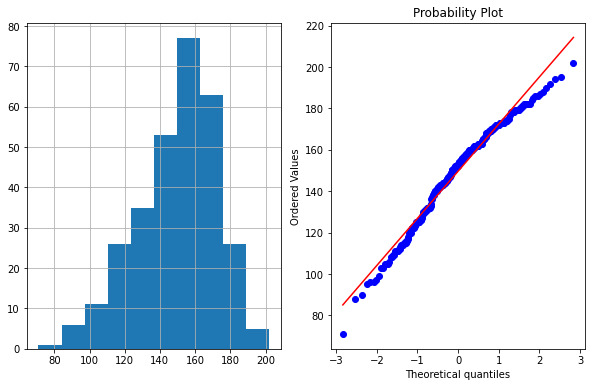

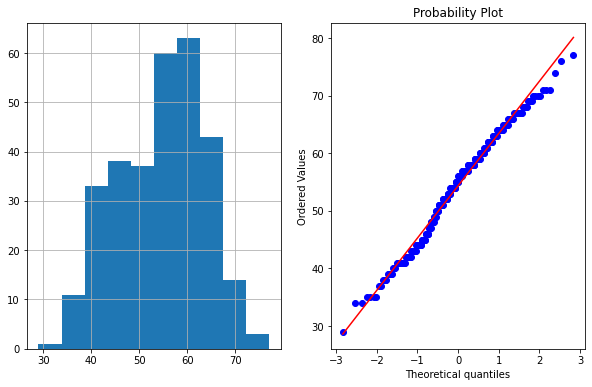

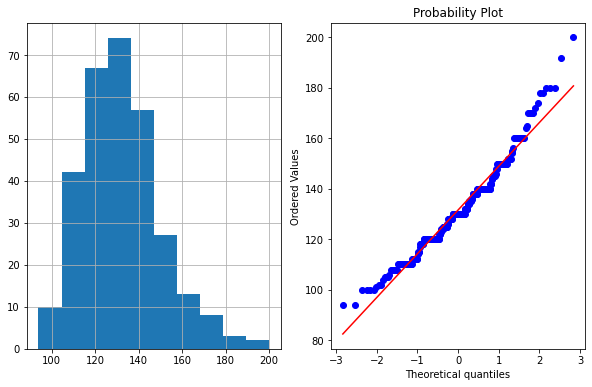

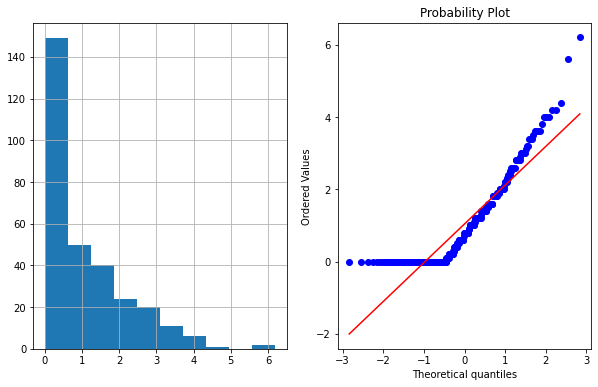

In [39]:
for column in numeric_columns:
    plot_data(heart_df,column)

We can see there is some skewness in the data. But that will be handled later by standardization techniques.

We can gain some intuition about relationships amongst numeric features by plotting each pair in a scattered form. To do this efficiently, pairplot method from Seaborn library comes in handy.

Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric variable in ``data`` will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

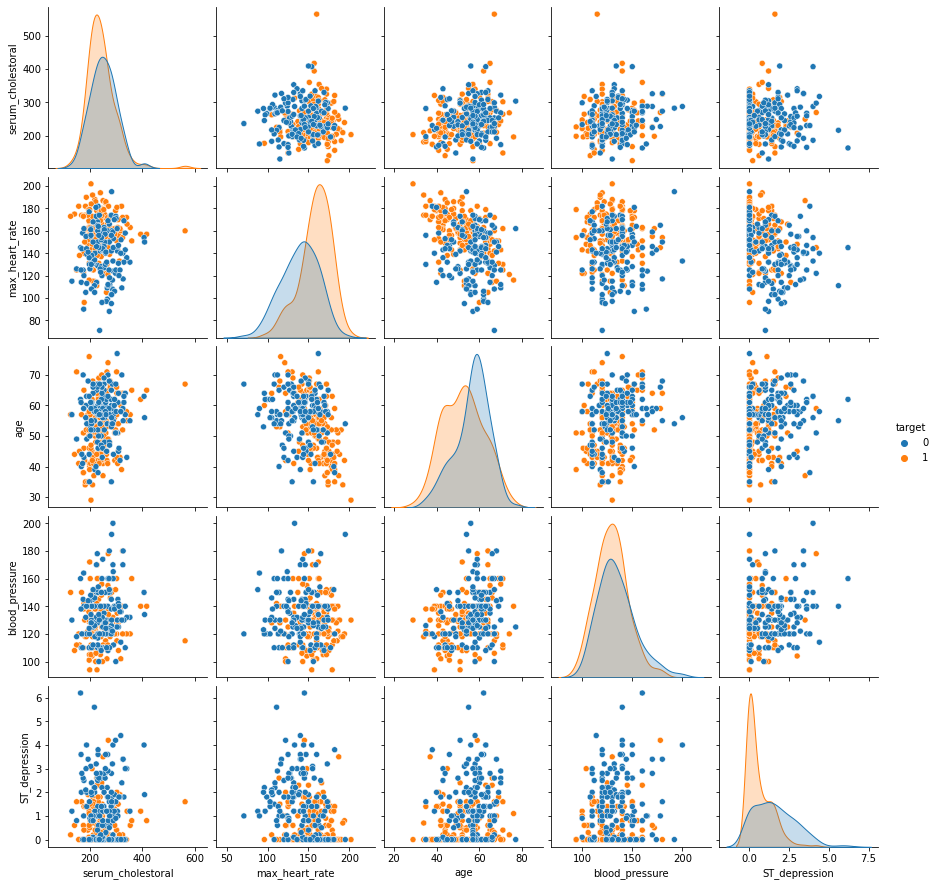

In [40]:
sns.pairplot(heart_df[['serum_cholestoral', 'max_heart_rate', 'age', 'blood_pressure', 'ST_depression', 'target']], hue='target', kind='scatter')
plt.show()

There is no notable relationship among the features that we can find from the scatter.

###### Boxplot for all the continuous features to see the outliers

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

<AxesSubplot:>

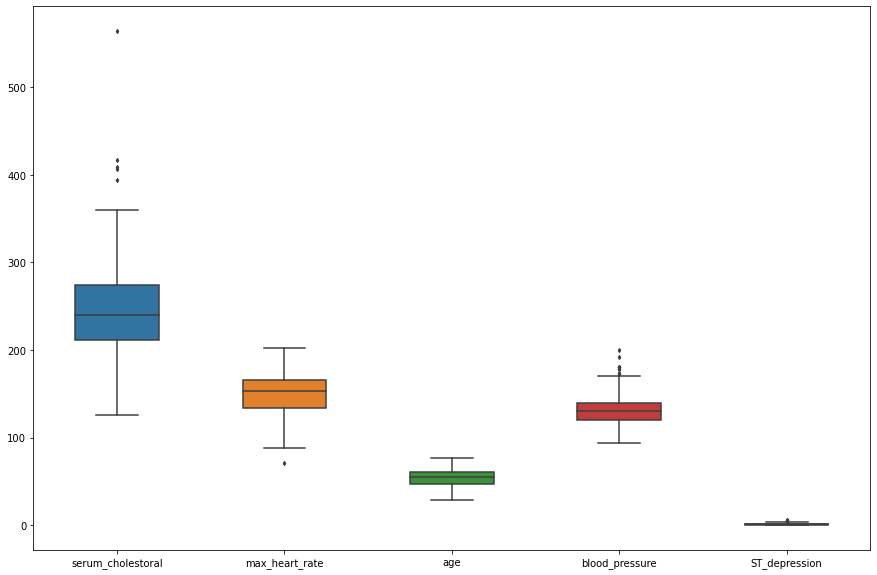

In [41]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=heart_df[numeric_columns], width= 0.5,ax=ax,  fliersize=3)

In [42]:
for column in numeric_columns:
    IQR=heart_df[column].quantile(0.75)-heart_df[column].quantile(0.25)
    lower_bridge=heart_df[column].quantile(0.25)-(IQR*1.5)
    upper_bridge=heart_df[column].quantile(0.75)+(IQR*1.5)
    print('Lower Bridge for the column {0} is {1}'.format(column, lower_bridge))
    print('Upper Bridge for the column {0} is {1}'.format(column, upper_bridge))

Lower Bridge for the column serum_cholestoral is 115.75
Upper Bridge for the column serum_cholestoral is 369.75
Lower Bridge for the column max_heart_rate is 84.75
Upper Bridge for the column max_heart_rate is 214.75
Lower Bridge for the column age is 27.25
Upper Bridge for the column age is 81.25
Lower Bridge for the column blood_pressure is 90.0
Upper Bridge for the column blood_pressure is 170.0
Lower Bridge for the column ST_depression is -2.4000000000000004
Upper Bridge for the column ST_depression is 4.0


######  Removing the outliers

Code reference for outlier removal is taken from the below resource:
    
https://github.com/krishnaik06/Feature-Engineering-Live-sessions/blob/master/Outliers.ipynb

We have considered to replace the outliers with lower bridge or higher bridge value shown above instead of just removing them from the dataset

In [43]:
for column in numeric_columns:
    if (column == 'serum_cholestoral'):
        heart_df.loc[heart_df[column]>=369.75,'serum_cholestoral']=369.75
        heart_df.loc[heart_df[column]<=115.75,'serum_cholestoral']=115.75
    if (column == 'max_heart_rate'):
        heart_df.loc[heart_df[column]>=214.75,'max_heart_rate']=214.75
        heart_df.loc[heart_df[column]<=84.75,'max_heart_rate']=84.75
    if (column == 'age'):
        heart_df.loc[heart_df[column]>=81.25,'age']=81.25
        heart_df.loc[heart_df[column]<=27.25,'age']=27.25
    if (column == 'blood_pressure'):
        heart_df.loc[heart_df[column]>=170.0,'blood_pressure']=170.0
        heart_df.loc[heart_df[column]<=90.0,'blood_pressure']=90.0
    else:
        heart_df.loc[heart_df[column]>=4.0,'ST_depression']=4.0
        heart_df.loc[heart_df[column]<=-2.40,'ST_depression']=-2.40

After removing the outliers, we can again check the boxplot to see if all the outliers are removed or not

<AxesSubplot:>

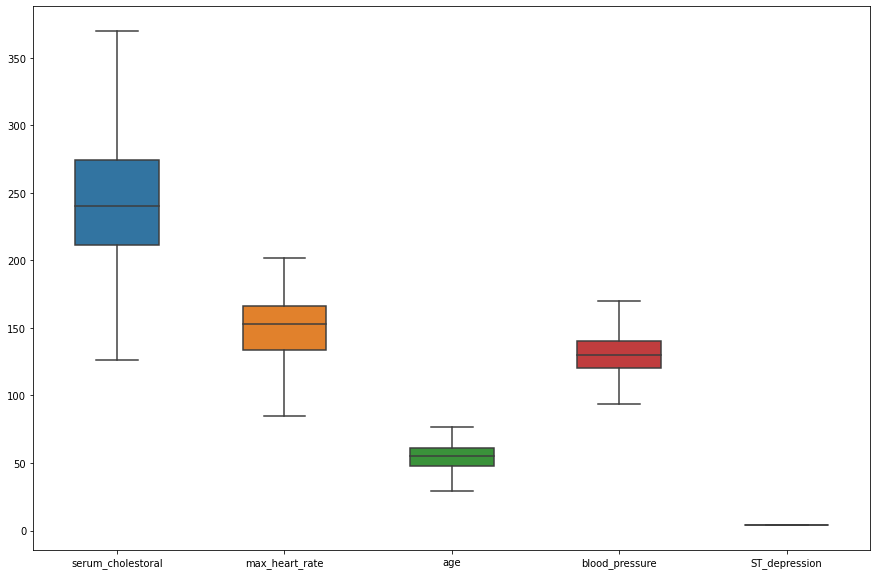

In [44]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=heart_df[numeric_columns], width= 0.5,ax=ax,  fliersize=3)

Above plot show all the outliers are removed successfully

After removing the outliers, we should see the data to be normally distributed where the features were having more outliers. But for the feature with less outliers we should not mark much difference.

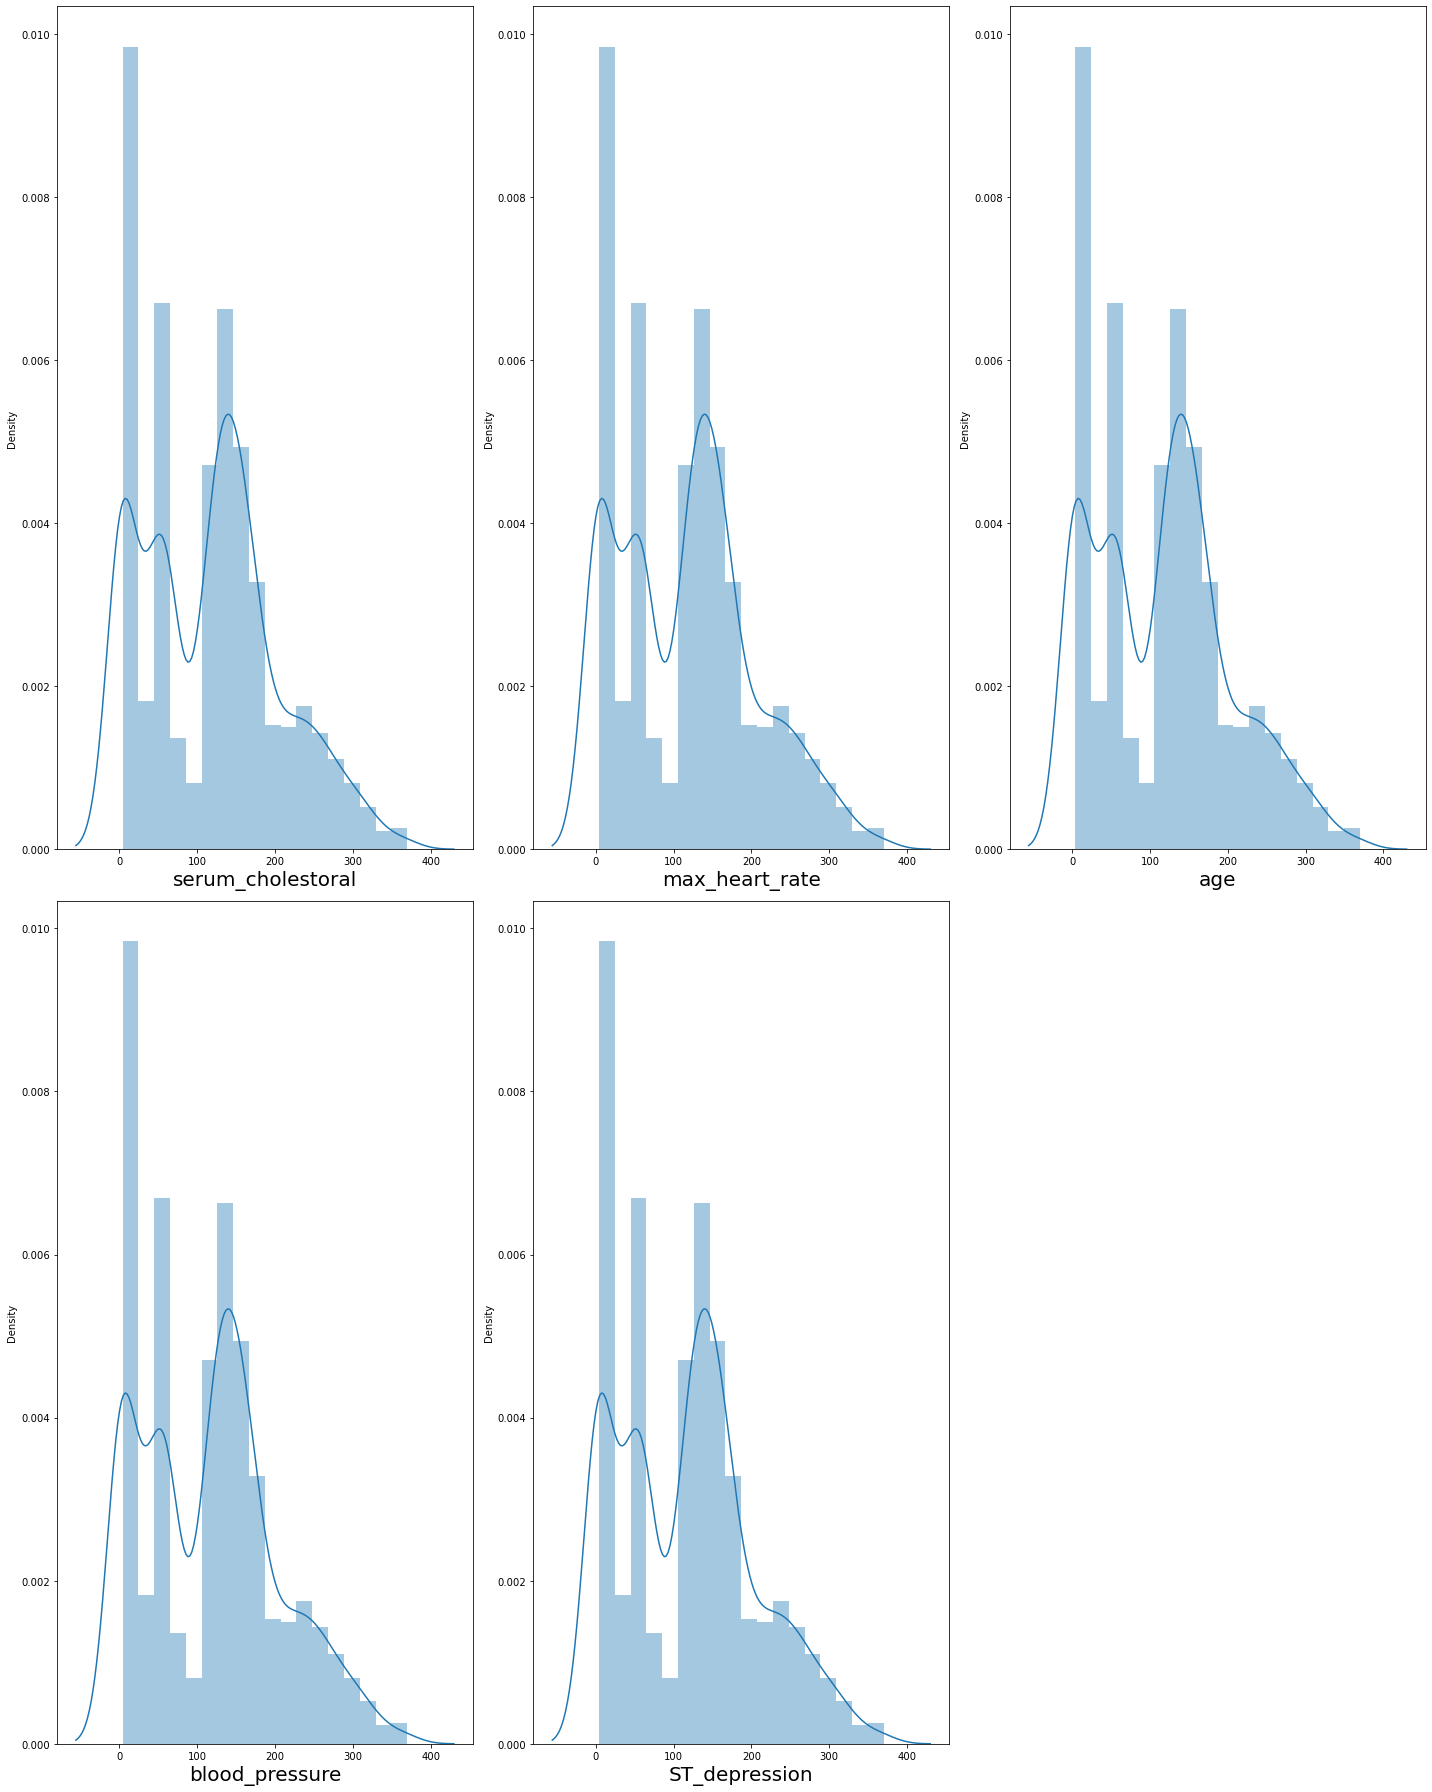

In [45]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numeric_columns:
    if plotnumber<=5 :
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(heart_df[numeric_columns])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

array([[<AxesSubplot:title={'center':'serum_cholestoral'}>,
        <AxesSubplot:title={'center':'max_heart_rate'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'blood_pressure'}>],
       [<AxesSubplot:title={'center':'ST_depression'}>, <AxesSubplot:>]],
      dtype=object)

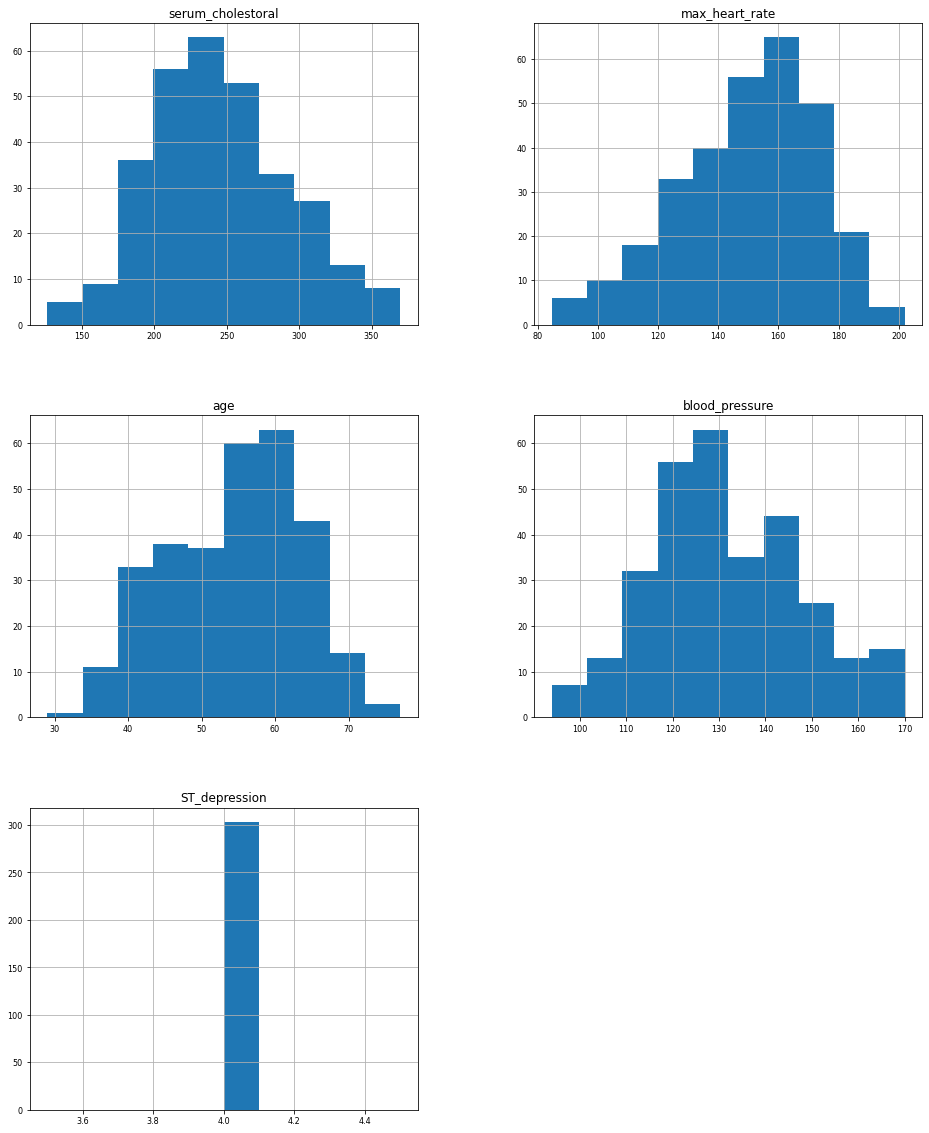

In [46]:
heart_df[numeric_columns].hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

###### Feature Selection

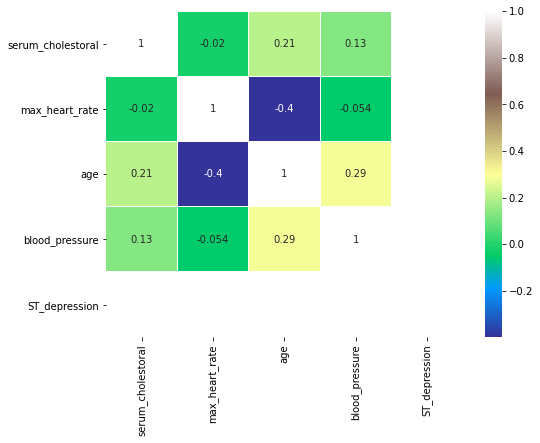

In [47]:
sns.heatmap(heart_df[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

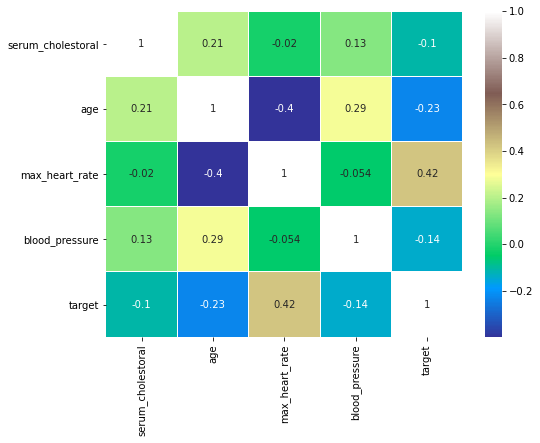

In [48]:
corr = heart_df[['serum_cholestoral', 'age', 'max_heart_rate', 'blood_pressure', 'target']].corr()
sns.heatmap(corr,annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

<AxesSubplot:>

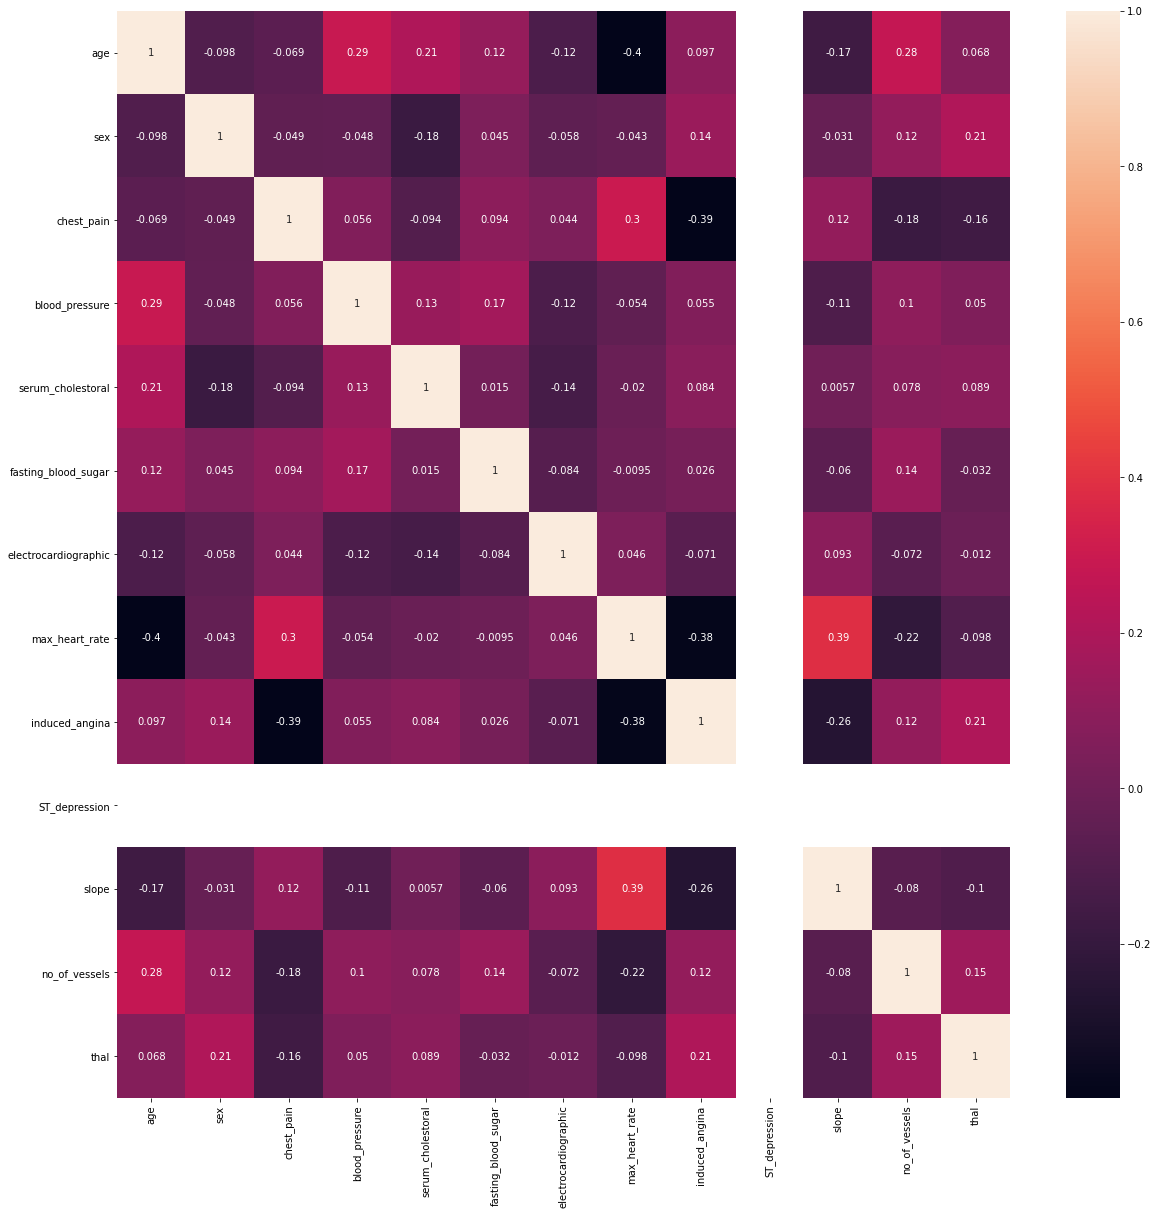

In [49]:
corr=heart_df.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(heart_df[top_features].corr(),annot=True)

In [50]:
threshold=0.8

In [51]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [52]:
correlation(heart_df.iloc[:,:-1],threshold)

set()

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(heart_df[numeric_columns].values, i)
                          for i in range(len(heart_df[numeric_columns].columns))]
vif["Features"] = heart_df[numeric_columns].columns

In [55]:
vif

,VIF,Features
0,1.06,serum_cholestoral
1,1.20,max_heart_rate
2,1.34,age
3,1.10,blood_pressure
4,175.17,ST_depression


## Model Building Using Base Learners without hyperparameter optimization 

Below, we are going to create Machine Learning models using the algorithms as mentioned in our research topic.
- Logistic Regression
- Decision Tree
- K-Nearest Neighbour
- Artificial Neural NEtwork
Then we will evaluate the performance of the models using the performance metrics mentioned in our research topic. 

**Import Required Libraries**

In [56]:
# Import train_test_split to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Import StandardScalar to standardize the features
from sklearn.preprocessing import StandardScaler

# Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Import Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier

# Import K-Nearest Neighbour Model
from sklearn.neighbors import KNeighborsClassifier

# Import scikit-learn metrics module for measuring performance of the models
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, plot_confusion_matrix, classification_report

### Final pre-processing of data

Code reference for this is taken from below source:

https://www.youtube.com/watch?v=BotYLBQfd5M

First we will split our dataset to train test set by holdout method with a ratio of 80:20 respectively. Then, we will use Standard scalar method to scale the data where mean of the dataset will be zero and standard deviation of the dataset will be one by applying the formula z = (x - u) / s

In [57]:
# First split the dataset into independent and dependet features
X = heart_df.iloc[:, :-1]
y = heart_df.iloc[:,-1:]

In [58]:
# Make sure the dependent and independt features are split correctly
print("Shape of Independt Features: {}\nShape of Dependent Features: {}".format(X.shape, y.shape))
print("Columns present in Independt Features: {}\nColumns present in Dependent Features: {}".format(X.columns, y.columns))

Shape of Independt Features: (303, 13)
Shape of Dependent Features: (303, 1)
Columns present in Independt Features: Index(['age', 'sex', 'chest_pain', 'blood_pressure', 'serum_cholestoral',
       'fasting_blood_sugar', 'electrocardiographic', 'max_heart_rate',
       'induced_angina', 'ST_depression', 'slope', 'no_of_vessels', 'thal'],
      dtype='object')
Columns present in Dependent Features: Index(['target'], dtype='object')


In [59]:
# Now split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [60]:
# Check for shape of train and test datasets
print("Shape of X_train: {}\nShape of y_train: {}".format(X_train.shape, y_train.shape))
print("Shape of X_test: {}\nShape of y_test: {}".format(X_test.shape, y_test.shape))

Shape of X_train: (242, 13)
Shape of y_train: (242, 1)
Shape of X_test: (61, 13)
Shape of y_test: (61, 1)


In [288]:
X_test

,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,no_of_vessels,thal
179,57.00,1,0,150,276.00,0,0,112.00,1,4.00,1,1,1
228,59.00,1,3,170,288.00,0,0,159.00,0,4.00,1,0,3
111,57.00,1,2,150,126.00,1,1,173.00,0,4.00,2,1,3
246,56.00,0,0,134,369.75,0,0,150.00,1,4.00,1,2,3
60,71.00,0,2,110,265.00,1,0,130.00,0,4.00,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69.00,1,2,140,254.00,0,0,146.00,0,4.00,1,3,3
104,50.00,1,2,129,196.00,0,1,163.00,0,4.00,2,0,2
300,68.00,1,0,144,193.00,1,1,141.00,0,4.00,1,2,3
193,60.00,1,0,145,282.00,0,0,142.00,1,4.00,1,2,3


In [289]:
y_test

,target
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


In [61]:
# Now we scale training set to bring it to standard normal form by using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We have scaled the data after splitting them into train test sets, to avoid ***data leakage*** which might arise if the scaling is done before splitting the data. Because if scaling is done before scaling the data, then the mean and average is claculated on the whole dataset. So in this case while testing the model, some information (like mean and standard deviation) from training set might have already been shared with test set. 

### Model Building and Performance Evaluation

Reference for model bilding is taken from below sources:
    
https://github.com/g-shreekant/Heart-Disease-Prediction-using-Machine-Learning/blob/master/Heart_disease_prediction.ipynb

https://github.com/shalakasaraogi/heart-disease-prediction/blob/master/heart-disease-prediction.ipynb



#### Logistic Regression 

In [62]:
# Logistic Regression Model Building
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [63]:
# Predict the output for test data using trained model with Logistic Regression
y_pred_lr = logistic_model.predict(X_test_scaled)

#### Performance Evaluation for Logistic Regression Model

https://scikit-learn.org/stable/modules/model_evaluation.html

In [64]:
accuracy = accuracy_score(y_test,y_pred_lr)
accuracy

0.819672131147541

In [65]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_lr)
conf_mat

array([[26,  3],
       [ 8, 24]], dtype=int64)

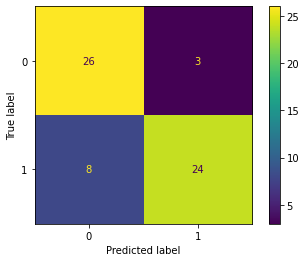

In [66]:
# Plot Confusion Matrix
plot_confusion_matrix(logistic_model, X_test_scaled, y_test)  
plt.show()

In [67]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [68]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.819672131147541

In [69]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.896551724137931

In [70]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7647058823529411

In [71]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8253968253968255

In [72]:
# Classification Report
target_names = ['Heart_Disease_Present','Heart_Disease_Not_Present']
print ('Classification Report is: \n {}'.format(classification_report(y_test,y_pred_lr, target_names=target_names)))

Classification Report is: 
                            precision    recall  f1-score   support

    Heart_Disease_Present       0.76      0.90      0.83        29
Heart_Disease_Not_Present       0.89      0.75      0.81        32

                 accuracy                           0.82        61
                macro avg       0.83      0.82      0.82        61
             weighted avg       0.83      0.82      0.82        61



In [73]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred_lr)
auc

0.8232758620689656

In [74]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)

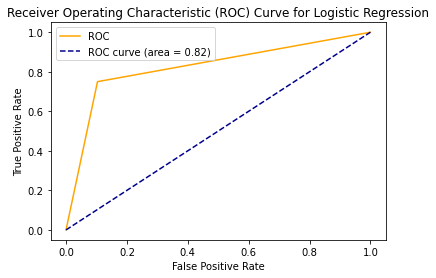

In [75]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend()
plt.show()

#### Decision Tree 

In [76]:
# Decision Tree Model Building
DecisionTree_model = DecisionTreeClassifier()
DecisionTree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [77]:
# Predict the output for test data using trained model with Decision Tree
y_pred_dt = DecisionTree_model.predict(X_test_scaled)

#### Performance Evaluation for DecisionTree Classifier Model

In [78]:
accuracy = accuracy_score(y_test,y_pred_dt)
accuracy

0.8032786885245902

In [79]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_dt)
conf_mat

array([[23,  6],
       [ 6, 26]], dtype=int64)

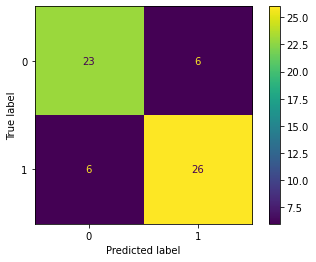

In [80]:
# Plot Confusion Matrix
plot_confusion_matrix(DecisionTree_model, X_test_scaled, y_test)  
plt.show()

In [81]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [82]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8032786885245902

In [83]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.7931034482758621

In [84]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7931034482758621

In [85]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.7931034482758621

In [86]:
# Classification Report
target_names = ['Heart_Disease_Present','Heart_Disease_Not_Present']
print ('Classification Report is: \n {}'.format(classification_report(y_test,y_pred_dt, target_names=target_names)))

Classification Report is: 
                            precision    recall  f1-score   support

    Heart_Disease_Present       0.79      0.79      0.79        29
Heart_Disease_Not_Present       0.81      0.81      0.81        32

                 accuracy                           0.80        61
                macro avg       0.80      0.80      0.80        61
             weighted avg       0.80      0.80      0.80        61



In [87]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred_dt)
auc

0.802801724137931

In [88]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)

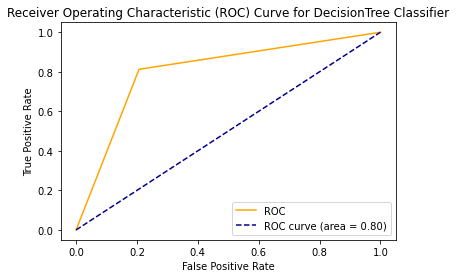

In [89]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for DecisionTree Classifier')
plt.legend()
plt.show()

#### K-Nearest Neighbour Classifier

In [90]:
# K-Nearest Neighbour Model Building
KNN_model = KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [91]:
# Predict the output for test data using trained model with K-Nearest Neighbour Model
y_pred_knn = KNN_model.predict(X_test_scaled)

#### Performance Evaluation for K-Nearest Neighbour Classifier Model

In [92]:
accuracy = accuracy_score(y_test,y_pred_knn)
accuracy

0.8852459016393442

In [93]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_knn)
conf_mat

array([[27,  2],
       [ 5, 27]], dtype=int64)

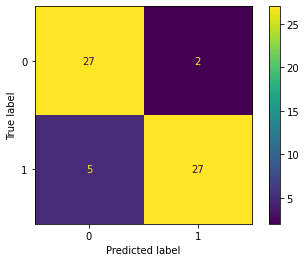

In [94]:
# Plot Confusion Matrix
plot_confusion_matrix(KNN_model, X_test_scaled, y_test)  
plt.show()

In [95]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [96]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8852459016393442

In [97]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9310344827586207

In [98]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.84375

In [99]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8852459016393444

In [100]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8852459016393444

In [101]:
# Classification Report
target_names = ['Heart_Disease_Present','Heart_Disease_Not_Present']
print ('Classification Report is: \n {}'.format(classification_report(y_test,y_pred_knn, target_names=target_names)))

Classification Report is: 
                            precision    recall  f1-score   support

    Heart_Disease_Present       0.84      0.93      0.89        29
Heart_Disease_Not_Present       0.93      0.84      0.89        32

                 accuracy                           0.89        61
                macro avg       0.89      0.89      0.89        61
             weighted avg       0.89      0.89      0.89        61



In [102]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred_knn)
auc

0.8873922413793103

In [103]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)

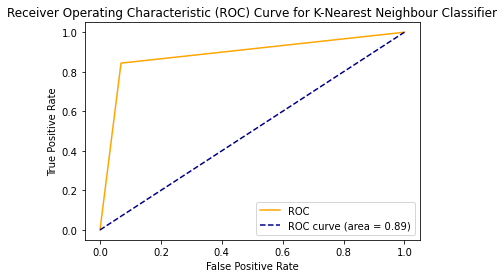

In [104]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for K-Nearest Neighbour Classifier')
plt.legend()
plt.show()

#### Artificial Neural Network

Code reference for this is taken from the below resources:

https://www.geeksforgeeks.org/heart-disease-prediction-using-ann/

In [105]:
# Import necessary modules to build and train Artifical Neural Network
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

In [106]:
# Inititalise the object for Artificial Neural Network
ANN_Classif = Sequential() 
# Input Layer with dimension as 13 as there are 13 independent features and 8 Neurons, Activation function is Relu
ANN_Classif.add(Dense(activation = "relu", input_dim = 13,  
                     units = 8, kernel_initializer = "uniform")) 
# Hidden Layer with 14 Neurons and Relu activation function
ANN_Classif.add(Dense(activation = "relu", units = 14,  
                     kernel_initializer = "uniform")) 
# Output Layer with 1 Neuron and Sigmoid activation Function
ANN_Classif.add(Dense(activation = "sigmoid", units = 1,  
                     kernel_initializer = "uniform")) 
# Compile the model with "Adam" Optimizer, "binary_crossentropy" loss and "accuracy" Metrics
ANN_Classif.compile(optimizer = 'adam' , loss = 'binary_crossentropy',  
                   metrics = ['accuracy'] ) 

In [107]:
# Model building after several iteration of training using Artificial Neural Network
ANN_Classif.fit(X_train_scaled , y_train , batch_size =8 ,epochs = 250 ) 

Epoch 1/250
31/31 [==============================] - 0s 674us/step - loss: 0.6929 - accuracy: 0.5413
Epoch 2/250
31/31 [==============================] - 0s 643us/step - loss: 0.6909 - accuracy: 0.5496
Epoch 3/250
31/31 [==============================] - 0s 734us/step - loss: 0.6814 - accuracy: 0.6074
Epoch 4/250
31/31 [==============================] - 0s 791us/step - loss: 0.6518 - accuracy: 0.7810
Epoch 5/250
31/31 [==============================] - 0s 777us/step - loss: 0.5948 - accuracy: 0.8058
Epoch 6/250
31/31 [==============================] - 0s 783us/step - loss: 0.5275 - accuracy: 0.8306
Epoch 7/250
31/31 [==============================] - 0s 767us/step - loss: 0.4727 - accuracy: 0.8306
Epoch 8/250
31/31 [==============================] - 0s 720us/step - loss: 0.4314 - accuracy: 0.8347
Epoch 9/250
31/31 [==============================] - 0s 754us/step - loss: 0.4016 - accuracy: 0.8471
Epoch 10/250
31/31 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy

31/31 [==============================] - 0s 720us/step - loss: 0.2422 - accuracy: 0.9174
Epoch 82/250
31/31 [==============================] - 0s 677us/step - loss: 0.2415 - accuracy: 0.9215
Epoch 83/250
31/31 [==============================] - 0s 686us/step - loss: 0.2390 - accuracy: 0.9132
Epoch 84/250
31/31 [==============================] - 0s 698us/step - loss: 0.2366 - accuracy: 0.9174
Epoch 85/250
31/31 [==============================] - 0s 701us/step - loss: 0.2349 - accuracy: 0.9174
Epoch 86/250
31/31 [==============================] - 0s 752us/step - loss: 0.2329 - accuracy: 0.9174
Epoch 87/250
31/31 [==============================] - 0s 785us/step - loss: 0.2318 - accuracy: 0.9132
Epoch 88/250
31/31 [==============================] - 0s 662us/step - loss: 0.2301 - accuracy: 0.9132
Epoch 89/250
31/31 [==============================] - 0s 706us/step - loss: 0.2283 - accuracy: 0.9215
Epoch 90/250
31/31 [==============================] - 0s 674us/step - loss: 0.2264 - accuracy: 

31/31 [==============================] - 0s 1ms/step - loss: 0.1450 - accuracy: 0.9587
Epoch 162/250
31/31 [==============================] - 0s 1ms/step - loss: 0.1436 - accuracy: 0.9587
Epoch 163/250
31/31 [==============================] - 0s 1ms/step - loss: 0.1417 - accuracy: 0.9587
Epoch 164/250
31/31 [==============================] - 0s 836us/step - loss: 0.1419 - accuracy: 0.9587
Epoch 165/250
31/31 [==============================] - 0s 804us/step - loss: 0.1417 - accuracy: 0.9587
Epoch 166/250
31/31 [==============================] - 0s 965us/step - loss: 0.1412 - accuracy: 0.9587
Epoch 167/250
31/31 [==============================] - 0s 965us/step - loss: 0.1395 - accuracy: 0.9587
Epoch 168/250
31/31 [==============================] - 0s 869us/step - loss: 0.1401 - accuracy: 0.9587
Epoch 169/250
31/31 [==============================] - 0s 998us/step - loss: 0.1393 - accuracy: 0.9587
Epoch 170/250
31/31 [==============================] - 0s 932us/step - loss: 0.1399 - accurac

31/31 [==============================] - 0s 1ms/step - loss: 0.0930 - accuracy: 0.9669
Epoch 242/250
31/31 [==============================] - 0s 870us/step - loss: 0.0923 - accuracy: 0.9669
Epoch 243/250
31/31 [==============================] - 0s 1ms/step - loss: 0.0912 - accuracy: 0.9669
Epoch 244/250
31/31 [==============================] - 0s 933us/step - loss: 0.0918 - accuracy: 0.9669
Epoch 245/250
31/31 [==============================] - 0s 1ms/step - loss: 0.0913 - accuracy: 0.9669
Epoch 246/250
31/31 [==============================] - 0s 933us/step - loss: 0.0903 - accuracy: 0.9669
Epoch 247/250
31/31 [==============================] - 0s 1ms/step - loss: 0.0897 - accuracy: 0.9669
Epoch 248/250
31/31 [==============================] - 0s 965us/step - loss: 0.0904 - accuracy: 0.9669
Epoch 249/250
31/31 [==============================] - 0s 1ms/step - loss: 0.0921 - accuracy: 0.9669
Epoch 250/250
31/31 [==============================] - 0s 1ms/step - loss: 0.0897 - accuracy: 0.9

#### Performance Evaluation for Artificial Neural Network

In [108]:
# Predict the output for test data using trained model with Artificial Neural Network
y_pred_ANN = ANN_Classif.predict(X_test_scaled) 
y_pred_ANN = (y_pred_ANN > 0.5) 

In [109]:
accuracy = accuracy_score(y_test,y_pred_ANN)
accuracy

0.8360655737704918

In [110]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_ANN)
conf_mat

array([[25,  4],
       [ 6, 26]], dtype=int64)

In [111]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [112]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8360655737704918

In [113]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8620689655172413

In [114]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8064516129032258

In [115]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8333333333333334

In [116]:
# Classification Report
target_names = ['Heart_Disease_Present','Heart_Disease_Not_Present']
print ('Classification Report is: \n {}'.format(classification_report(y_test,y_pred_ANN, target_names=target_names)))

Classification Report is: 
                            precision    recall  f1-score   support

    Heart_Disease_Present       0.81      0.86      0.83        29
Heart_Disease_Not_Present       0.87      0.81      0.84        32

                 accuracy                           0.84        61
                macro avg       0.84      0.84      0.84        61
             weighted avg       0.84      0.84      0.84        61



In [117]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred_ANN)
auc

0.8372844827586207

In [118]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ANN)

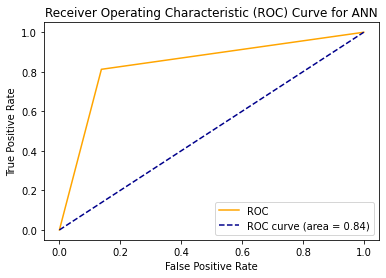

In [119]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for ANN')
plt.legend()
plt.show()

### Model Building Using Base Learners with hyperparameter optimization 

Below, we are going to Use GridSearchCV hyperparameter optimization technique to identify best parameters for each of the machine leaning algorithms mentioned below as per our research paper and then using those parameters we will build and test our model for it's performance

- Logistic Regression
- Decision Tree
- K-Nearest Neighbour

Before going ahead and apply GridSearchCV cross validation technique, let's import the module from sklearn library

Code reference for this is taken from the below resource:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [120]:
# Import GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

#### Logistic Regression with Hyperparameter Optimization

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html

For Logistic Regression, we have considered below hyperoparameter values:
-	**Cs:** Each value for Cs indicates inverse of regularization strength. For integer value of Cs, a range between 1e-4 and 1e4 is chosen in logarithmic scale.
-	**Cv:** Default value for cv is Stratified K-Folds. An integer value indicates, number of folds used.
-	**Penalty:** It is used to indicate the penalization parameter for regularization (l1, l2, elasticnet).
-	**Scoring:** A string value used to evaluate the model performance. 
-	**Solver:** It is an algorithm, which is used for optimization problems. ‘liblinear’ is a good choice for small datasets.
-	**N_jobs:** This indicates, total number of CPU core to be used during cross validation iterations. Default value for this is “None”, which means only 1 core. A value of -1 indicates all CPU cores to be used.


In [121]:
# Build the grid for the hyperparameters
grid_lr = {"C": np.logspace(-3, 3, 7), "penalty": ["l1","l2"], "solver":['liblinear']}
# Logistic Regression Model Building using GridSearchCV
logistic_model = LogisticRegression()
logistic_model_cv=GridSearchCV(logistic_model,param_grid=grid_lr,cv=10, n_jobs=3)
logistic_model_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [122]:
# Print Best Parameters and Best Accuracy Score
print("tuned hpyerparameters :(best parameters) ",logistic_model_cv.best_params_)
print("accuracy :",logistic_model_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.8226666666666667


In [123]:
# Build Logistic Regression Using Best Parameters identified in GridSearchCV
logistic_model_best_param = LogisticRegression(C=1, penalty="l1", solver="liblinear")
logistic_model_best_param.fit(X_train_scaled, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [124]:
# Predict the output for test data using Logistic Regression with best parameters
y_pred_lr_best_param = logistic_model_best_param.predict(X_test_scaled)

#### Performance Evaluation for Logistic Regression Model with Best Parameters

In [125]:
accuracy = accuracy_score(y_test,y_pred_lr_best_param)
accuracy

0.8360655737704918

In [126]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_lr_best_param)
conf_mat

array([[26,  3],
       [ 7, 25]], dtype=int64)

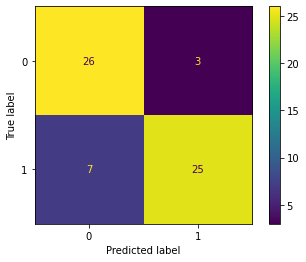

In [127]:
# Plot Confusion Matrix
plot_confusion_matrix(logistic_model_best_param, X_test_scaled, y_test)  
plt.show()

In [128]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [129]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8360655737704918

In [130]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.896551724137931

In [131]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7878787878787878

In [132]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8387096774193549

In [133]:
# Classification Report
target_names = ['Heart_Disease_Present','Heart_Disease_Not_Present']
print ('Classification Report is: \n {}'.format(classification_report(y_test,y_pred_lr_best_param, target_names=target_names)))

Classification Report is: 
                            precision    recall  f1-score   support

    Heart_Disease_Present       0.79      0.90      0.84        29
Heart_Disease_Not_Present       0.89      0.78      0.83        32

                 accuracy                           0.84        61
                macro avg       0.84      0.84      0.84        61
             weighted avg       0.84      0.84      0.84        61



In [134]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred_lr_best_param)
auc

0.8389008620689655

In [135]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr_best_param)

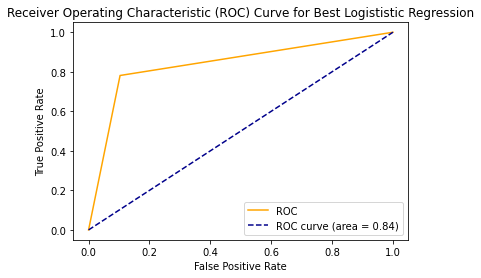

In [136]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best Logististic Regression')
plt.legend()
plt.show()

#### Decision Tree with Hyperparameter Optimization

https://stackoverflow.com/questions/38709690/scikit-learn-using-gridsearchcv-on-decisiontreeclassifier

For Decision Tree, we have considered below hyperoparameter values:
-   **Criterion:** This is a function to specify the quality if split. “gini” is used for Gini Impurity and “entropy” is used for information gain.
-   **Max_depth:** The level to which a tree can be built. It is essential to prune the tree before it overfits the data.
-   **Min_samples_split:** It indicates, minimum number of samples based on which the internal node of a tree can be split.  
-   **Max_leaf_nodes:** Best nodes are kept in the first based on the relative reduction in impurity.


In [137]:
# Build the grid for the hyperparameters
grid_dt = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15), 'min_samples_split': [2, 3, 4],'max_leaf_nodes': list(range(2, 100))}
# Decision Tree Model Building using GridSearchCV
DecisionTree_model = DecisionTreeClassifier()
DecisionTree_model_cv=GridSearchCV(DecisionTree_model,param_grid=grid_dt,cv=10, n_jobs=3)
DecisionTree_model_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=3,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [138]:
# Print Best Parameters and Best Accuracy Score
print("tuned hpyerparameters :(best parameters) ",DecisionTree_model_cv.best_params_)
print("accuracy :",DecisionTree_model_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 9, 'min_samples_split': 3}
accuracy : 0.8183333333333334


In [139]:
# Build Decision Tree Using Best Parameters identified in GridSearchCV
DecisionTree_model_best_param = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=9, min_samples_split=2)
DecisionTree_model_best_param.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=9)

In [140]:
# Predict the output for test data using Decision Tree with best parameters
y_pred_dt_best_param = DecisionTree_model_best_param.predict(X_test_scaled)

#### Performance Evaluation for Decision Tree Model with Best Parameters

In [141]:
accuracy = accuracy_score(y_test,y_pred_dt_best_param)
accuracy

0.8524590163934426

In [142]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_dt_best_param)
conf_mat

array([[26,  3],
       [ 6, 26]], dtype=int64)

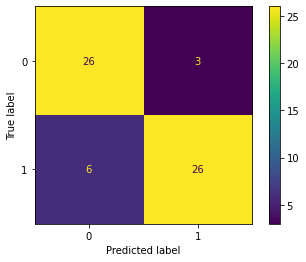

In [143]:
# Plot Confusion Matrix
plot_confusion_matrix(DecisionTree_model_best_param, X_test_scaled, y_test)  
plt.show()

In [144]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [145]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8524590163934426

In [146]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.896551724137931

In [147]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8125

In [148]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8524590163934426

In [149]:
# Classification Report
target_names = ['Heart_Disease_Present','Heart_Disease_Not_Present']
print ('Classification Report is: \n {}'.format(classification_report(y_test,y_pred_dt_best_param, target_names=target_names)))

Classification Report is: 
                            precision    recall  f1-score   support

    Heart_Disease_Present       0.81      0.90      0.85        29
Heart_Disease_Not_Present       0.90      0.81      0.85        32

                 accuracy                           0.85        61
                macro avg       0.85      0.85      0.85        61
             weighted avg       0.86      0.85      0.85        61



In [150]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred_dt_best_param)
auc

0.8545258620689655

In [151]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt_best_param)

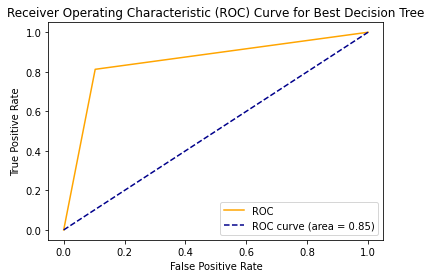

In [152]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best Decision Tree')
plt.legend()
plt.show()

#### K-Nearest Neighbour with Hyperparameter Optimization 

For K-Nearest Neighbour, we have considered below hyperoparameter values:
-	**N_neighbors:** It indicates number of neighbours to be used.
-	**Weights:** It is used to indicate the weights assigned based on the distance. A uniform weight indicates, equal weights for all data points in the neighbourhood, whereas distance weight indicates, lower weights to distant data points and highest weight to nearer data points.
-	**N_jobs:** This indicates, total number of CPU core to be used during cross validation iterations. Default value for this is “None”, which means only 1 core. A value of -1 indicates all CPU cores to be used.
   

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [153]:
# Build the grid for the hyperparameters
grid_KNN = { 'n_neighbors':np.arange(3, 15), 'weights': ['uniform','distance']}
# K-Nearest Neighbour Model Building using GridSearchCV
KNN_model = KNeighborsClassifier()
KNN_model_cv=GridSearchCV(KNN_model,param_grid=grid_KNN,cv=10, n_jobs=3)
KNN_model_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=3,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'weights': ['uniform', 'distance']})

In [154]:
# Print Best Parameters and Best Accuracy Score
print("tuned hpyerparameters :(best parameters) ",KNN_model_cv.best_params_)
print("accuracy :",KNN_model_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'n_neighbors': 9, 'weights': 'distance'}
accuracy : 0.8143333333333335


In [155]:
# Build K-Nearest Neighbour Using Best Parameters identified in GridSearchCV
KNN_model_best_param = KNeighborsClassifier(n_neighbors=9, weights='distance')
KNN_model_best_param.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [156]:
# Predict the output for test data using Decision Tree with best parameters
y_pred_KNN_best_param = KNN_model_best_param.predict(X_test_scaled)

#### Performance Evaluation for K-Nearest Neighbour Model with Best Parameters

In [157]:
accuracy = accuracy_score(y_test,y_pred_KNN_best_param)
accuracy

0.8852459016393442

In [158]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_KNN_best_param)
conf_mat

array([[27,  2],
       [ 5, 27]], dtype=int64)

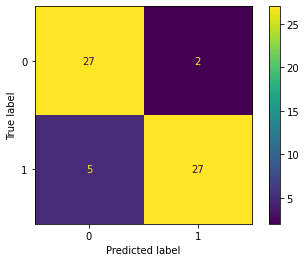

In [159]:
# Plot Confusion Matrix
plot_confusion_matrix(KNN_model_best_param, X_test_scaled, y_test)  
plt.show()

In [160]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [161]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8852459016393442

In [162]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9310344827586207

In [163]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.84375

In [164]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8852459016393444

In [165]:
# Classification Report
target_names = ['Heart_Disease_Present','Heart_Disease_Not_Present']
print ('Classification Report is: \n {}'.format(classification_report(y_test,y_pred_KNN_best_param, target_names=target_names)))

Classification Report is: 
                            precision    recall  f1-score   support

    Heart_Disease_Present       0.84      0.93      0.89        29
Heart_Disease_Not_Present       0.93      0.84      0.89        32

                 accuracy                           0.89        61
                macro avg       0.89      0.89      0.89        61
             weighted avg       0.89      0.89      0.89        61



In [166]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred_KNN_best_param)
auc

0.8873922413793103

In [167]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_KNN_best_param)

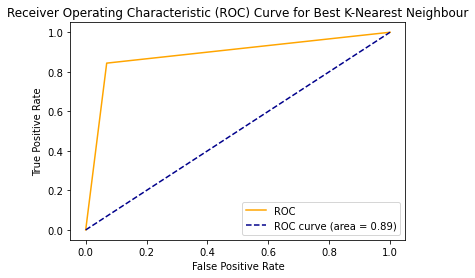

In [168]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best K-Nearest Neighbour')
plt.legend()
plt.show()

### Model Building Using Ensemble Machine Learning Algorithms

Since Ensemble Techniques use weak base learners to come up with better performing models having low bias and low variance, we will consider them to increase the generalisation capability of the models. As a part of this we will use the algorithms with their best identified hyperparameters we have experiemented above. Maninly we will focus on the below ensemble techniques:
- Bagging
- Stacking

### Bagging

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [169]:
# Import Bagging Classifier Module before going ahead with model building
from sklearn.ensemble import BaggingClassifier
# Import RandomForestClassifier Module
from sklearn.ensemble import RandomForestClassifier

#### Model Building Using Bagging for Logistic Regression

In [170]:
# Build Logistic Regression Using BaggingClassifier with Best Parameters identified in GridSearchCV
bagging_logistic_model = BaggingClassifier(base_estimator = LogisticRegression(C=1, penalty="l1", solver="liblinear"),
                                          n_estimators=8, max_samples=0.5,
                                          bootstrap=True, random_state=3,oob_score=True, n_jobs=3)
bagging_logistic_model.fit(X_train_scaled, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1, penalty='l1',
                                                    solver='liblinear'),
                  max_samples=0.5, n_estimators=8, n_jobs=3, oob_score=True,
                  random_state=3)

In [171]:
# Predict the output for test data using Bagging Classifier for Logistic Regression
y_pred_lr_bag = bagging_logistic_model.predict(X_test_scaled)

#### Performance Evaluation for Bagging Clasifier using Logistic Regression Models

In [172]:
accuracy = accuracy_score(y_test,y_pred_lr_bag)
accuracy

0.8360655737704918

Since the accuracy didn't improve much by using Bagging Classifier for Logistic Regression, lets use GridSearch CV to find out the best number of estimators.

In [173]:
# Define Grid for Bagging Classifier for Logistic Regression
grid_lr_bag = {'n_estimators': np.arange(2, 80, 5), 'max_samples': np.arange(0.2, 1, 0.1), 
               'max_features': np.arange(0.2, 1, 0.1) }
# Indentify best hyperparameter for the logistic Regression Bagging classifier using GridSearch CV
logistic_model = LogisticRegression(C=1, penalty="l1", solver="liblinear")
logistic_model_bag = BaggingClassifier(base_estimator=logistic_model)
logistic_model_bag_cv = GridSearchCV(estimator=logistic_model_bag,param_grid=grid_lr_bag,cv=5,n_jobs =3)
logistic_model_bag_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=LogisticRegression(C=1,
                                                                           penalty='l1',
                                                                           solver='liblinear')),
             n_jobs=3,
             param_grid={'max_features': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_samples': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77])})

In [174]:
# Print Best Parameters and Best Accuracy Score
print("tuned hpyerparameters :(best parameters) ",logistic_model_bag_cv.best_params_)
print("accuracy :",logistic_model_bag_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_features': 0.8000000000000003, 'max_samples': 0.2, 'n_estimators': 7}
accuracy : 0.8474489795918367


In [175]:
# Build Bagging Classifier using Logistic Regression with Best Parameters identified in GridSearchCV
bagging_logistic_model_best_param = BaggingClassifier(base_estimator = LogisticRegression(C=1, penalty="l1", solver="liblinear"),
                                          n_estimators=47, max_samples=0.7, max_features = 0.4,
                                          bootstrap=True, random_state=3,oob_score=True, n_jobs=3)
bagging_logistic_model_best_param.fit(X_train_scaled, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1, penalty='l1',
                                                    solver='liblinear'),
                  max_features=0.4, max_samples=0.7, n_estimators=47, n_jobs=3,
                  oob_score=True, random_state=3)

In [176]:
# Predict the output for test data using Bagging Classifier for Logistic Regression with best parameters
y_pred_lr_bag_best_param = bagging_logistic_model_best_param.predict(X_test_scaled)

#### Performance Evaluation of Bagging Classifier for Logistic Regression Model with Best Parameters

In [177]:
accuracy = accuracy_score(y_test,y_pred_lr_bag_best_param)
accuracy

0.8852459016393442

In [178]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_lr_bag_best_param)
conf_mat

array([[25,  4],
       [ 3, 29]], dtype=int64)

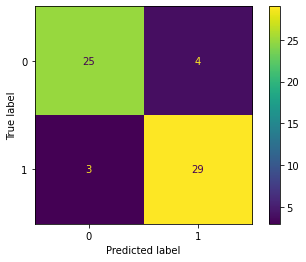

In [179]:
# Plot Confusion Matrix
plot_confusion_matrix(bagging_logistic_model_best_param, X_test_scaled, y_test)  
plt.show()

In [180]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [181]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8852459016393442

In [182]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8620689655172413

In [183]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8928571428571429

In [184]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8771929824561403

In [185]:
# Classification Report
target_names = ['Heart_Disease_Present','Heart_Disease_Not_Present']
print ('Classification Report is: \n {}'.format(classification_report(y_test,y_pred_lr_bag_best_param, 
                                                                      target_names=target_names)))

Classification Report is: 
                            precision    recall  f1-score   support

    Heart_Disease_Present       0.89      0.86      0.88        29
Heart_Disease_Not_Present       0.88      0.91      0.89        32

                 accuracy                           0.89        61
                macro avg       0.89      0.88      0.88        61
             weighted avg       0.89      0.89      0.89        61



In [186]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred_lr_bag_best_param)
auc

0.8841594827586207

In [187]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr_bag_best_param)

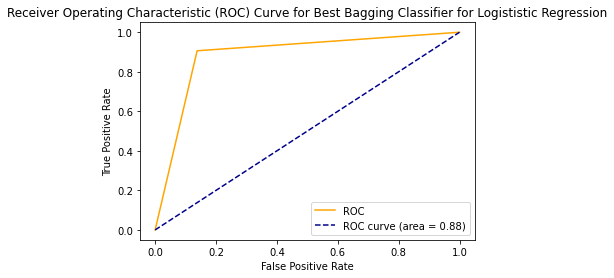

In [188]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best Bagging Classifier for Logististic Regression')
plt.legend()
plt.show()

#### Model Building Using Bagging for Decision Tree

In [189]:
# Build Decision Tree Using BaggingClassifier with Best Parameters identified in GridSearchCV
bagging_DecisionTree_model = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=9, min_samples_split=2),
                                          n_estimators=8, max_samples=0.5, max_features=0.7,
                                          bootstrap=True, random_state=3,oob_score=True, n_jobs=3)
bagging_DecisionTree_model.fit(X_train_scaled, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=4,
                                                        max_leaf_nodes=9),
                  max_features=0.7, max_samples=0.5, n_estimators=8, n_jobs=3,
                  oob_score=True, random_state=3)

In [190]:
# Predict the output for test data using Bagging Classifier for Decision Tree
y_pred_dt_bag = bagging_DecisionTree_model.predict(X_test_scaled)

#### Performance Evaluation for Bagging Clasifier using Decision Tree Models

In [191]:
accuracy = accuracy_score(y_test,y_pred_dt_bag)
accuracy

0.8688524590163934

Since the accuracy didn't improve much by using Bagging Classifier for Decision Tree, lets use GridSearch CV to find out the best number of estimators.

In [192]:
# Define Grid for Bagging Classifier for Decision Tree
grid_dt_bag = {'n_estimators': np.arange(2, 80, 5), 'max_samples': np.arange(0.2, 1, 0.1), 
               'max_features': np.arange(0.2, 1, 0.1) }
# Indentify best hyperparameter for the Decision Tree Bagging classifier using GridSearch CV
DecisionTree_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=9, min_samples_split=2)
DecisionTree_model_bag = BaggingClassifier(base_estimator=DecisionTree_model)
DecisionTree_model_bag_cv = GridSearchCV(estimator=DecisionTree_model_bag,param_grid=grid_dt_bag,cv=5,n_jobs =3)
DecisionTree_model_bag_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                               max_depth=4,
                                                                               max_leaf_nodes=9)),
             n_jobs=3,
             param_grid={'max_features': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_samples': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77])})

In [193]:
# Print Best Parameters and Best Accuracy Score
print("tuned hpyerparameters :(best parameters) ",DecisionTree_model_bag_cv.best_params_)
print("accuracy :",DecisionTree_model_bag_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_features': 0.5000000000000001, 'max_samples': 0.9000000000000001, 'n_estimators': 22}
accuracy : 0.8554421768707483


In [194]:
# Build Bagging Classifier using Decision Tree with Best Parameters identified in GridSearchCV
bagging_DecisionTree_model_best_param = BaggingClassifier(base_estimator = 
                                        DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=9, 
                                                               min_samples_split=2),
                                          n_estimators=62, max_samples=0.5, max_features = 0.4,
                                          bootstrap=True, random_state=3,oob_score=True, n_jobs=3)
bagging_DecisionTree_model_best_param.fit(X_train_scaled, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=4,
                                                        max_leaf_nodes=9),
                  max_features=0.4, max_samples=0.5, n_estimators=62, n_jobs=3,
                  oob_score=True, random_state=3)

In [195]:
# Predict the output for test data using Bagging Classifier for Decision Tree with best parameters
y_pred_dt_bag_best_param = bagging_DecisionTree_model_best_param.predict(X_test_scaled)

#### Performance Evaluation of Bagging Classifier for Decision Tree Model with Best Parameters

In [196]:
accuracy = accuracy_score(y_test,y_pred_dt_bag_best_param)
accuracy

0.9180327868852459

In [197]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_dt_bag_best_param)
conf_mat

array([[25,  4],
       [ 1, 31]], dtype=int64)

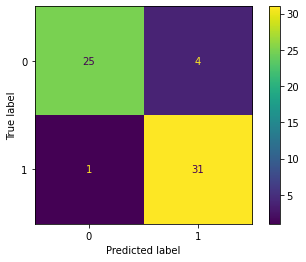

In [198]:
# Plot Confusion Matrix
plot_confusion_matrix(bagging_DecisionTree_model_best_param, X_test_scaled, y_test)  
plt.show()

In [199]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [200]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9180327868852459

In [201]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8620689655172413

In [202]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.9615384615384616

In [203]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9090909090909091

In [204]:
# Classification Report
target_names = ['Heart_Disease_Present','Heart_Disease_Not_Present']
print ('Classification Report is: \n {}'.format(classification_report(y_test,y_pred_dt_bag_best_param, 
                                                                      target_names=target_names)))

Classification Report is: 
                            precision    recall  f1-score   support

    Heart_Disease_Present       0.96      0.86      0.91        29
Heart_Disease_Not_Present       0.89      0.97      0.93        32

                 accuracy                           0.92        61
                macro avg       0.92      0.92      0.92        61
             weighted avg       0.92      0.92      0.92        61



In [205]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred_dt_bag_best_param)
auc

0.9154094827586207

In [206]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt_bag_best_param)

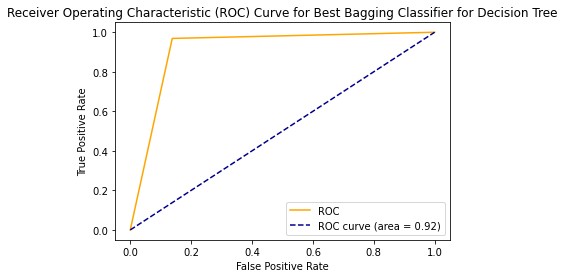

In [207]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best Bagging Classifier for Decision Tree')
plt.legend()
plt.show()

In [208]:
# Save the model
import pickle

with open('modelForPrediction.sav', 'wb') as f:
    pickle.dump(bagging_DecisionTree_model_best_param,f)
    
with open('standardScaler.sav', 'wb') as f:
    pickle.dump(scaler,f)

#### Model building using Random Forest with Hyperparameter Optimization 

https://stackoverflow.com/questions/47570307/tuning-parameters-of-the-classifier-used-by-baggingclassifier

Above we have considered Bagging Classifier using Decision Tree to improve the performance of the model. This is equivalent to use Random Forest Classifier which uses multiple Decision Tree to generalize the model. The aim here is to check and evaluate if both are giving same result in terms of performance or not. In order to find the best hyperparameters for Randon Forest, we will use Grid Search CV.

In [209]:
# Define Grid for Random Forest Classifier
#grid_rf = {"n_estimators" : np.arange(20, 80, 8),
#    'criterion': ['gini', 'entropy'],
#    'max_depth': np.arange(3, 15, 1),
#    'class_weight' : ["balanced", "balanced_subsample"],
#    'max_samples': np.arange(0.2, 1, 0.1),
#    'max_features': np.arange(0.2, 1, 0.1)} 
# Indentify best hyperparameter for the Random Forest classifier using GridSearch CV
#RandomForest_model = RandomForestClassifier()
#RandomForest_cv = GridSearchCV(estimator=RandomForest_model,param_grid=grid_rf,cv=5,n_jobs =3)
#RandomForest_cv.fit(X_train_scaled, y_train)


In [210]:
# Print Best Parameters and Best Accuracy Score
#print("tuned hpyerparameters :(best parameters) ",RandomForest_cv.best_params_)
#print("accuracy :",RandomForest_cv.best_score_)

In [211]:
from IPython.display import Image

**Best Parameters Random Forest**


Below screen is attached as a proof for the experiments done to identify the best parameters. Also the cells above haiving these code are commented out as they take a lot of time to execute.
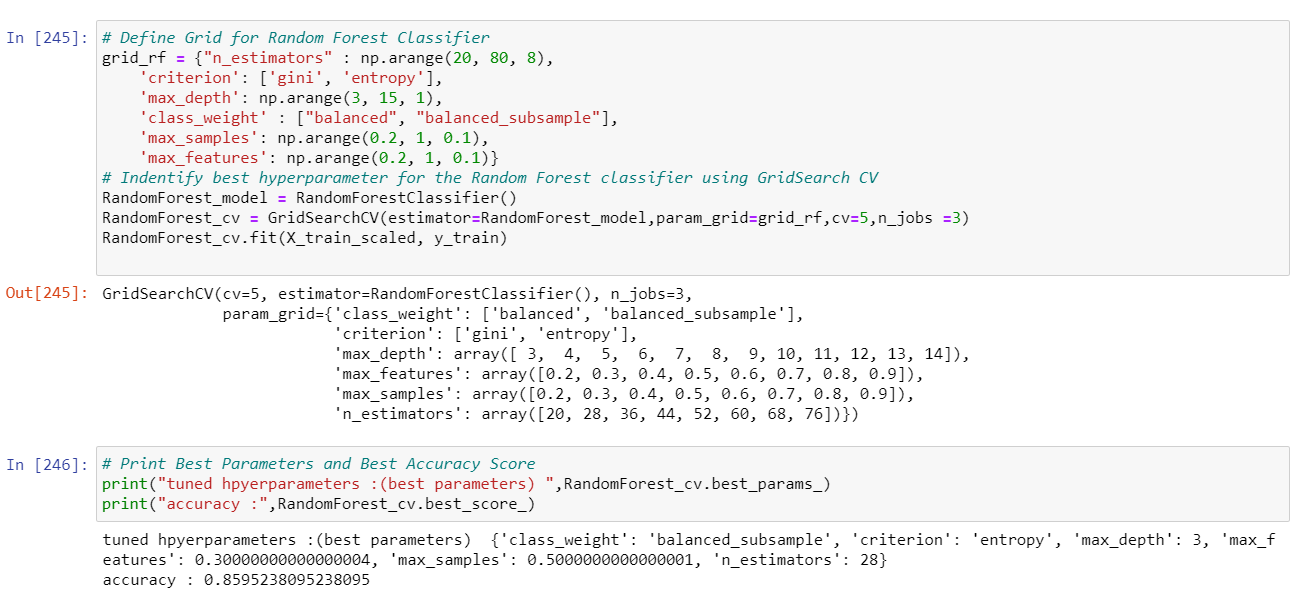

In [212]:
# Build Random Forest Classifier with Best Parameters identified in GridSearchCV
RandomForest_model_best_param = RandomForestClassifier(criterion='entropy', max_depth=3, 
                                          n_estimators=28, max_samples=0.5, max_features = 0.3, 
                                          class_weight = 'balanced_subsample',
                                          bootstrap=True, random_state=3,oob_score=True, n_jobs=3)
RandomForest_model_best_param.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=3, max_features=0.3, max_samples=0.5,
                       n_estimators=28, n_jobs=3, oob_score=True,
                       random_state=3)

In [213]:
# Predict the output for test data using Random Forest Classifier with best parameters
y_pred_rf_best_param = RandomForest_model_best_param.predict(X_test_scaled)

#### Performance Evaluation of Random Forest Classifier with Best Parameters

In [214]:
accuracy = accuracy_score(y_test,y_pred_rf_best_param)
accuracy

0.8688524590163934

In [215]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_rf_best_param)
conf_mat

array([[27,  2],
       [ 6, 26]], dtype=int64)

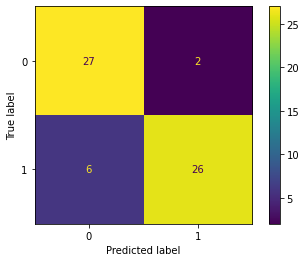

In [216]:
# Plot Confusion Matrix
plot_confusion_matrix(RandomForest_model_best_param, X_test_scaled, y_test)  
plt.show()

In [217]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred_rf_best_param)
auc

0.8717672413793104

In [218]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_best_param)

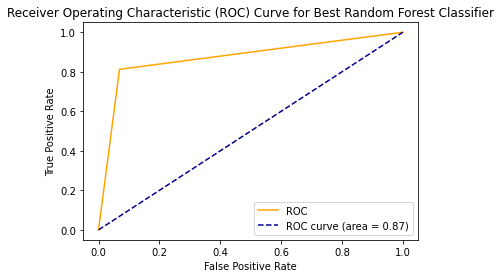

In [219]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best Random Forest Classifier')
plt.legend()
plt.show()

Even though Random Forest performs better in terms of generlizing the data for heart disease and is considered to be combination of multiple decision tree's it did not provide better performance than multiple decision tree's considered in a bagging classifier.Hence, we will not consider this as a part of our experiment.

#### Model Building Using Bagging for K-Nearest Neighbour

In [220]:
# Build K-Nearest Neighbour Using BaggingClassifier with Best Parameters identified in GridSearchCV
bagging_KNN_model = BaggingClassifier(
    base_estimator = KNeighborsClassifier(n_neighbors=9, weights='distance'),
                     n_estimators=8, max_samples=0.5, max_features=0.7,
                     bootstrap=True, random_state=3,oob_score=True, n_jobs=3)
bagging_KNN_model.fit(X_train_scaled, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=9,
                                                      weights='distance'),
                  max_features=0.7, max_samples=0.5, n_estimators=8, n_jobs=3,
                  oob_score=True, random_state=3)

In [221]:
# Predict the output for test data using Bagging Classifier for K-Nearest Neighbour
y_pred_KNN_bag = bagging_KNN_model.predict(X_test_scaled)

#### Performance Evaluation for Bagging Clasifier using K-Nearest Neighbour Models

In [222]:
accuracy = accuracy_score(y_test,y_pred_KNN_bag)
accuracy

0.8524590163934426

Since the accuracy didn't improve much by using Bagging Classifier for K-Nearest Neighbour, lets use GridSearch CV to find out the best number of estimators.

In [223]:
# Define Grid for Bagging Classifier for K-Nearest Neighbour
grid_KNN_bag = {'n_estimators': np.arange(3, 42, 3), 'max_samples': np.arange(0.2, 1, 0.1), 
               'max_features': np.arange(0.2, 1, 0.1) }
# Indentify best hyperparameter for the K-Nearest Neighbour Bagging classifier using GridSearch CV
KNN_model = KNeighborsClassifier(n_neighbors=9, weights='distance')
KNN_model_bag = BaggingClassifier(base_estimator=KNN_model)
KNN_model_bag_cv = GridSearchCV(estimator=KNN_model_bag,param_grid=grid_KNN_bag,cv=5,n_jobs =3)
KNN_model_bag_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=9,
                                                                             weights='distance')),
             n_jobs=3,
             param_grid={'max_features': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_samples': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39])})

In [224]:
# Print Best Parameters and Best Accuracy Score
print("tuned hpyerparameters :(best parameters) ",DecisionTree_model_bag_cv.best_params_)
print("accuracy :",DecisionTree_model_bag_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_features': 0.5000000000000001, 'max_samples': 0.9000000000000001, 'n_estimators': 22}
accuracy : 0.8554421768707483


In [225]:
# Build Bagging Classifier using K-Nearest Neighbour with Best Parameters identified in GridSearchCV
bagging_KNN_model_best_param = BaggingClassifier(base_estimator = 
                                        KNeighborsClassifier(n_neighbors=9, weights='distance'),
                                          n_estimators=12, max_samples=0.5, max_features = 0.3,
                                          bootstrap=True, random_state=3,oob_score=True, n_jobs=3)
bagging_KNN_model_best_param.fit(X_train_scaled, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=9,
                                                      weights='distance'),
                  max_features=0.3, max_samples=0.5, n_estimators=12, n_jobs=3,
                  oob_score=True, random_state=3)

In [226]:
# Predict the output for test data using Bagging Classifier for K-Nearest Neighbour with best parameters
y_pred_KNN_bag_best_param = bagging_KNN_model_best_param.predict(X_test_scaled)

#### Performance Evaluation of Bagging Classifier for K-Nearest Neighbour Model with Best Parameters

In [227]:
accuracy = accuracy_score(y_test,y_pred_KNN_bag_best_param)
accuracy

0.8524590163934426

In [228]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_KNN_bag_best_param)
conf_mat

array([[27,  2],
       [ 7, 25]], dtype=int64)

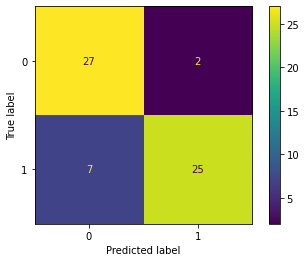

In [229]:
# Plot Confusion Matrix
plot_confusion_matrix(bagging_KNN_model_best_param, X_test_scaled, y_test)  
plt.show()

In [230]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [231]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8524590163934426

In [232]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9310344827586207

In [233]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7941176470588235

In [234]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8571428571428571

In [235]:
# Classification Report
target_names = ['Heart_Disease_Present','Heart_Disease_Not_Present']
print ('Classification Report is: \n {}'.format(classification_report(y_test,y_pred_KNN_bag_best_param, 
                                                                      target_names=target_names)))

Classification Report is: 
                            precision    recall  f1-score   support

    Heart_Disease_Present       0.79      0.93      0.86        29
Heart_Disease_Not_Present       0.93      0.78      0.85        32

                 accuracy                           0.85        61
                macro avg       0.86      0.86      0.85        61
             weighted avg       0.86      0.85      0.85        61



In [236]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred_KNN_bag_best_param)
auc

0.8561422413793104

In [237]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_KNN_bag_best_param)

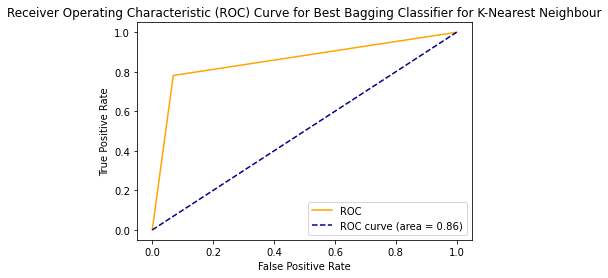

In [238]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best Bagging Classifier for K-Nearest Neighbour')
plt.legend()
plt.show()

We did not see any improvement for KNN with Bagging Classifier with comparision to hyperparameterized KNN. 

### Stacking

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html

In [239]:
# Import Modules for Stacking
from sklearn.ensemble import StackingClassifier

# LR Stack

In [240]:
#Build Stacking Classifier
logistic_model_best_param_level1 = LogisticRegression(C=1, penalty="l1", solver="liblinear")
base_estimators = [
('DecisionTree_model_best_param_level0', DecisionTreeClassifier(criterion='entropy', 
                                                              max_depth=4, max_leaf_nodes=9, min_samples_split=2)),
('KNN_model_best_param_level0',  KNeighborsClassifier(n_neighbors=9, weights='distance'))]

stacking_model_lr = StackingClassifier(estimators = base_estimators,
                                      final_estimator=logistic_model_best_param_level1, cv=5, n_jobs=3)
stacking_model_lr.fit(X_train_scaled, y_train)

StackingClassifier(cv=5,
                   estimators=[('DecisionTree_model_best_param_level0',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=4,
                                                       max_leaf_nodes=9)),
                               ('KNN_model_best_param_level0',
                                KNeighborsClassifier(n_neighbors=9,
                                                     weights='distance'))],
                   final_estimator=LogisticRegression(C=1, penalty='l1',
                                                      solver='liblinear'),
                   n_jobs=3)

In [241]:
# Predict the output for test data using Stacking Classifier 
y_pred_lr_stack = stacking_model_lr.predict(X_test_scaled)

In [242]:
accuracy = accuracy_score(y_test,y_pred_lr_stack)
accuracy

0.8852459016393442

# DT Stack

In [243]:
#Build Stacking Classifier
DecisionTree_model_best_param_level1 = DecisionTreeClassifier(criterion='entropy', 
                                                              max_depth=4, max_leaf_nodes=9, min_samples_split=2)
base_estimators = [
('logistic_model_best_param_level0', LogisticRegression(C=1, penalty="l1", solver="liblinear")),
('KNN_model_best_param_level0',  KNeighborsClassifier(n_neighbors=9, weights='distance'))]

stacking_model_dt = StackingClassifier(estimators = base_estimators,
                                      final_estimator=DecisionTree_model_best_param_level1, cv=5, n_jobs=3)
stacking_model_dt.fit(X_train_scaled, y_train)

StackingClassifier(cv=5,
                   estimators=[('logistic_model_best_param_level0',
                                LogisticRegression(C=1, penalty='l1',
                                                   solver='liblinear')),
                               ('KNN_model_best_param_level0',
                                KNeighborsClassifier(n_neighbors=9,
                                                     weights='distance'))],
                   final_estimator=DecisionTreeClassifier(criterion='entropy',
                                                          max_depth=4,
                                                          max_leaf_nodes=9),
                   n_jobs=3)

In [244]:
# Predict the output for test data using Stacking Classifier 
y_pred_dt_stack = stacking_model_dt.predict(X_test_scaled)

In [245]:
accuracy = accuracy_score(y_test,y_pred_dt_stack)
accuracy

0.8360655737704918

# KNN Stack

In [246]:
#Build Stacking Classifier
KNN_model_best_param_level1 = KNeighborsClassifier(n_neighbors=9, weights='distance')
base_estimators = [
('logistic_model_best_param_level0', LogisticRegression(C=1, penalty="l1", solver="liblinear")),
('DecisionTree_model_best_param_level0', DecisionTreeClassifier(criterion='entropy', 
                                                              max_depth=4, max_leaf_nodes=9, min_samples_split=2) )]

stacking_model_KNN = StackingClassifier(estimators = base_estimators,
                                      final_estimator=KNN_model_best_param_level1, cv=5, n_jobs=3)
stacking_model_KNN.fit(X_train_scaled, y_train)

StackingClassifier(cv=5,
                   estimators=[('logistic_model_best_param_level0',
                                LogisticRegression(C=1, penalty='l1',
                                                   solver='liblinear')),
                               ('DecisionTree_model_best_param_level0',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=4,
                                                       max_leaf_nodes=9))],
                   final_estimator=KNeighborsClassifier(n_neighbors=9,
                                                        weights='distance'),
                   n_jobs=3)

In [247]:
# Predict the output for test data using Stacking Classifier 
y_pred_KNN_stack = stacking_model_KNN.predict(X_test_scaled)

In [248]:
accuracy = accuracy_score(y_test,y_pred_KNN_stack)
accuracy

0.8524590163934426

# LR Bag Stack 

In [249]:
#Build Stacking Classifier
logistic_model_bag_best_param_level1 = BaggingClassifier(base_estimator = 
                                          LogisticRegression(C=1, penalty="l1", solver="liblinear"),
                                          n_estimators=8, max_samples=0.5,
                                          bootstrap=True, random_state=3,oob_score=True, n_jobs=3)
base_estimators = [
('DecisionTree_model_bag_best_param_level0', BaggingClassifier(base_estimator = 
                                        DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=9, 
                                                               min_samples_split=2),
                                          n_estimators=62, max_samples=0.5, max_features = 0.4,
                                          bootstrap=True, random_state=3,oob_score=True, n_jobs=3)),
('KNN_model_bag_best_param_level0',  BaggingClassifier(base_estimator = 
                                        KNeighborsClassifier(n_neighbors=9, weights='distance'),
                                          n_estimators=12, max_samples=0.5, max_features = 0.3,
                                          bootstrap=True, random_state=3,oob_score=True, n_jobs=3))]

stacking_model_lr_bag = StackingClassifier(estimators = base_estimators,
                                      final_estimator=logistic_model_bag_best_param_level1, cv=5, n_jobs=3)
stacking_model_lr_bag.fit(X_train_scaled, y_train)

StackingClassifier(cv=5,
                   estimators=[('DecisionTree_model_bag_best_param_level0',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                        max_depth=4,
                                                                                        max_leaf_nodes=9),
                                                  max_features=0.4,
                                                  max_samples=0.5,
                                                  n_estimators=62, n_jobs=3,
                                                  oob_score=True,
                                                  random_state=3)),
                               ('KNN_model_bag_best_param_level0',
                                BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=9,
                                                                    

In [250]:
# Predict the output for test data using Stacking Classifier 
y_pred_lr_bag_stack = stacking_model_lr_bag.predict(X_test_scaled)

In [251]:
accuracy = accuracy_score(y_test,y_pred_lr_bag_stack)
accuracy

0.8852459016393442

In [252]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_lr_bag_stack)
conf_mat

array([[26,  3],
       [ 4, 28]], dtype=int64)

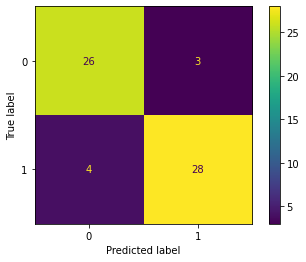

In [253]:
# Plot Confusion Matrix
plot_confusion_matrix(stacking_model_lr_bag, X_test_scaled, y_test)  
plt.show()

In [254]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [255]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8852459016393442

In [256]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.896551724137931

In [257]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8666666666666667

In [258]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8813559322033899

In [259]:
# Classification Report
target_names = ['Heart_Disease_Present','Heart_Disease_Not_Present']
print ('Classification Report is: \n {}'.format(classification_report(y_test,y_pred_lr_bag_stack, 
                                                                      target_names=target_names)))

Classification Report is: 
                            precision    recall  f1-score   support

    Heart_Disease_Present       0.87      0.90      0.88        29
Heart_Disease_Not_Present       0.90      0.88      0.89        32

                 accuracy                           0.89        61
                macro avg       0.88      0.89      0.89        61
             weighted avg       0.89      0.89      0.89        61



In [260]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred_lr_bag_stack)
auc

0.8857758620689655

In [261]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr_bag_stack)

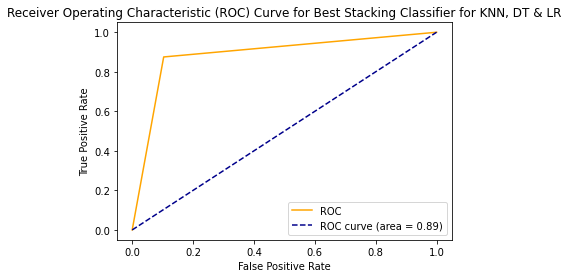

In [262]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best Stacking Classifier for KNN, DT & LR')
plt.legend()
plt.show()

# DT Bag Stack

In [263]:
#Build Stacking Classifier
DecisionTree_model_bag_best_param_level1 = BaggingClassifier(base_estimator = 
                                        DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=9, 
                                                               min_samples_split=2),
                                          n_estimators=62, max_samples=0.5, max_features = 0.4,
                                          bootstrap=True, random_state=3,oob_score=True, n_jobs=3)
base_estimators = [
('logistic_model_bag_best_param_level0', BaggingClassifier(base_estimator = 
                                          LogisticRegression(C=1, penalty="l1", solver="liblinear"),
                                          n_estimators=8, max_samples=0.5,
                                          bootstrap=True, random_state=3,oob_score=True, n_jobs=3)),
('KNN_model_bag_best_param_level0',  BaggingClassifier(base_estimator = 
                                        KNeighborsClassifier(n_neighbors=9, weights='distance'),
                                          n_estimators=12, max_samples=0.5, max_features = 0.3,
                                          bootstrap=True, random_state=3,oob_score=True, n_jobs=3))]

stacking_model_dt_bag = StackingClassifier(estimators = base_estimators,
                                      final_estimator=DecisionTree_model_bag_best_param_level1, cv=5, n_jobs=3)
stacking_model_dt_bag.fit(X_train_scaled, y_train)

StackingClassifier(cv=5,
                   estimators=[('logistic_model_bag_best_param_level0',
                                BaggingClassifier(base_estimator=LogisticRegression(C=1,
                                                                                    penalty='l1',
                                                                                    solver='liblinear'),
                                                  max_samples=0.5,
                                                  n_estimators=8, n_jobs=3,
                                                  oob_score=True,
                                                  random_state=3)),
                               ('KNN_model_bag_best_param_level0',
                                BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=9,
                                                                                      weights='distance'),
                                                  max_featu

In [264]:
# Predict the output for test data using Stacking Classifier 
y_pred_dt_bag_stack = stacking_model_dt_bag.predict(X_test_scaled)

In [265]:
accuracy = accuracy_score(y_test,y_pred_dt_bag_stack)
accuracy

0.8360655737704918

# KNN Bag Stack

In [266]:
#Build Stacking Classifier
KNN_model_bag_best_param_level1 = BaggingClassifier(base_estimator = 
                                        KNeighborsClassifier(n_neighbors=7, weights='distance'),
                                          n_estimators=12, max_samples=0.5, max_features = 0.3,
                                          bootstrap=True, random_state=3,oob_score=True, n_jobs=3)
base_estimators = [
('logistic_model_bag_best_param_level0', BaggingClassifier(base_estimator = 
                                          LogisticRegression(C=1, penalty="l1", solver="liblinear"),
                                          n_estimators=8, max_samples=0.5,
                                          bootstrap=True, random_state=3,oob_score=True, n_jobs=3)),
('DecisionTree_model_bag_best_param_level0',  BaggingClassifier(base_estimator = 
                                        DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=9, 
                                                               min_samples_split=2),
                                          n_estimators=62, max_samples=0.5, max_features = 0.4,
                                          bootstrap=True, random_state=3,oob_score=True, n_jobs=3))]

stacking_model_KNN_bag = StackingClassifier(estimators = base_estimators,
                                      final_estimator=KNN_model_bag_best_param_level1, cv=5, n_jobs=3)
stacking_model_KNN_bag.fit(X_train_scaled, y_train)

StackingClassifier(cv=5,
                   estimators=[('logistic_model_bag_best_param_level0',
                                BaggingClassifier(base_estimator=LogisticRegression(C=1,
                                                                                    penalty='l1',
                                                                                    solver='liblinear'),
                                                  max_samples=0.5,
                                                  n_estimators=8, n_jobs=3,
                                                  oob_score=True,
                                                  random_state=3)),
                               ('DecisionTree_model_bag_best_param_level0',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                        max_depth=4,
                                                

In [267]:
# Predict the output for test data using Stacking Classifier 
y_pred_KNN_bag_stack = stacking_model_KNN_bag.predict(X_test_scaled)

In [268]:
accuracy = accuracy_score(y_test,y_pred_KNN_bag_stack)
accuracy

0.8360655737704918

# GridSearch CV Stack

In [269]:
#param_grid = { 'dt__criterion':['gini','entropy'],
#           'dt__max_depth': np.arange(3, 16), 
#           'dt__min_samples_split': [2, 3, 4],
#           'final_estimator__C': np.logspace(-3, 3, 7), 
#           'final_estimator__penalty': ["l1","l2"], 
#           'knn__n_neighbors':np.arange(3, 15), 
#           'final_estimator__solver':['liblinear'],
#           'knn__weights': ['uniform','distance']
#             }
#base_estimators = [('dt',DecisionTreeClassifier()),('knn',KNeighborsClassifier())]
#final_estimator = LogisticRegression()
#stacking_classifier = StackingClassifier(estimators = base_estimators,
#                                      final_estimator=final_estimator)
#stacking_classifier_cv = GridSearchCV(estimator=stacking_classifier,param_grid=param_grid,cv=5, n_jobs=3)
#stacking_classifier_cv.fit(X_train_scaled, y_train)

In [270]:
# Print Best Parameters and Best Accuracy Score
#print("tuned hpyerparameters :(best parameters) ",stacking_classifier_cv.best_params_)
#print("accuracy :",stacking_classifier_cv.best_score_)

In [271]:
#Build Stacking Classifier
logistic_model_cv_level1 = LogisticRegression(C=10.0, penalty="l1", solver="liblinear")
base_estimators = [
('DecisionTree_model_cv_level0', DecisionTreeClassifier(criterion='entropy', 
                                                              max_depth=14, min_samples_split=3)),
('KNN_model_cv_level0',  KNeighborsClassifier(n_neighbors=9, weights='uniform'))]

stacking_model_lr_cv = StackingClassifier(estimators = base_estimators,
                                      final_estimator=logistic_model_cv_level1, cv=5, n_jobs=3)
stacking_model_lr_cv.fit(X_train_scaled, y_train)

StackingClassifier(cv=5,
                   estimators=[('DecisionTree_model_cv_level0',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=14,
                                                       min_samples_split=3)),
                               ('KNN_model_cv_level0',
                                KNeighborsClassifier(n_neighbors=9))],
                   final_estimator=LogisticRegression(C=10.0, penalty='l1',
                                                      solver='liblinear'),
                   n_jobs=3)

In [272]:
# Predict the output for test data using Stacking Classifier 
y_pred_lr_stack_cv = stacking_model_lr_cv.predict(X_test_scaled)

In [273]:
accuracy = accuracy_score(y_test,y_pred_lr_stack_cv)
accuracy

0.8852459016393442

In [274]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_lr_stack_cv)
conf_mat

array([[27,  2],
       [ 5, 27]], dtype=int64)

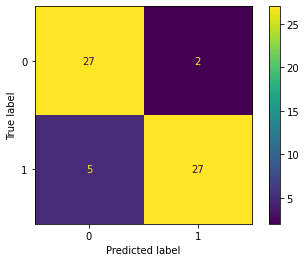

In [275]:
# Plot Confusion Matrix
plot_confusion_matrix(stacking_model_lr_cv, X_test_scaled, y_test)  
plt.show()

In [276]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [277]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8852459016393442

In [278]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9310344827586207

In [279]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.84375

In [280]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8852459016393444

In [281]:
# Classification Report
target_names = ['Heart_Disease_Present','Heart_Disease_Not_Present']
print ('Classification Report is: \n {}'.format(classification_report(y_test,y_pred_lr_stack_cv, 
                                                                      target_names=target_names)))

Classification Report is: 
                            precision    recall  f1-score   support

    Heart_Disease_Present       0.84      0.93      0.89        29
Heart_Disease_Not_Present       0.93      0.84      0.89        32

                 accuracy                           0.89        61
                macro avg       0.89      0.89      0.89        61
             weighted avg       0.89      0.89      0.89        61



In [282]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred_lr_stack_cv)
auc

0.8873922413793103

In [283]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr_stack_cv)

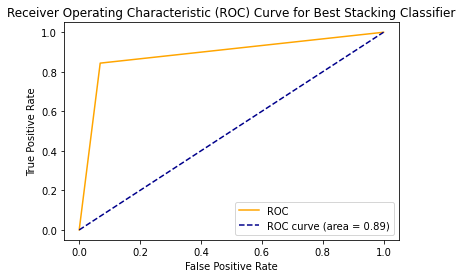

In [284]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best Stacking Classifier')
plt.legend()
plt.show()

# Stacking DT with DT and KNN

In [285]:
#Build Stacking Classifier
DecisionTree_model_cv_level1 = DecisionTreeClassifier(criterion='entropy', 
                                                              max_depth=14, min_samples_split=3)
base_estimators = [
('DecisionTree_model_cv_level0', DecisionTreeClassifier(criterion='entropy', 
                                                              max_depth=14, min_samples_split=3)),
('KNN_model_cv_level0',  KNeighborsClassifier(n_neighbors=9, weights='uniform'))]

stacking_model_dt_cv = StackingClassifier(estimators = base_estimators,
                                      final_estimator=DecisionTree_model_cv_level1, cv=5, n_jobs=3)
stacking_model_dt_cv.fit(X_train_scaled, y_train)

StackingClassifier(cv=5,
                   estimators=[('DecisionTree_model_cv_level0',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=14,
                                                       min_samples_split=3)),
                               ('KNN_model_cv_level0',
                                KNeighborsClassifier(n_neighbors=9))],
                   final_estimator=DecisionTreeClassifier(criterion='entropy',
                                                          max_depth=14,
                                                          min_samples_split=3),
                   n_jobs=3)

In [286]:
# Predict the output for test data using Stacking Classifier 
y_pred_dt_stack_cv = stacking_model_dt_cv.predict(X_test_scaled)

In [287]:
accuracy = accuracy_score(y_test,y_pred_dt_stack_cv)
accuracy

0.8524590163934426